In [2]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import cm 
from matplotlib import colors as mclr

plt.rc('figure', dpi=300)
plt.rc('font', family = 'Times New Roman')
plt.rc('font', size = 14)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=18)
plt.rc('lines', linewidth=2.)
plt.rc('lines',marker='.')

loadDataDirectory = "../data/"

figDirectory = "../figures/"
saveFigs = True

In [3]:
numrgsteps = 800
lmax = 1000000000000.0
muv = 0.046511627906976744
TBKT = 0.8117147570941106
sigma_TBKT = 0.0066680498211003835
rcoeff = 0.999833309828274

print("lmax = {l:0.0E}".format(l=lmax))

lmax = 1E+12


In [4]:
qs = np.load(loadDataDirectory+"qs.npy")
ws = np.load(loadDataDirectory+"ws.npy")
zs = np.load(loadDataDirectory+"zs.npy")
temps = np.load(loadDataDirectory+"temps.npy")

logls = np.load(loadDataDirectory+"logls.npy")
y_l = np.load(loadDataDirectory+"y_l_vs_tlogl.npy")
eps_l = np.load(loadDataDirectory+"eps_l_vs_tlogl.npy")
nfs = np.load(loadDataDirectory+"nfs_vs_t.npy")
xis = np.load(loadDataDirectory+"xis_vs_t.npy")

eps_b = np.load(loadDataDirectory+"eps_b_vs_tqw.npy")
eps_f = np.load(loadDataDirectory+"eps_f_vs_tqw.npy")
eps = np.load(loadDataDirectory+"eps_vs_tqw.npy")

noise = np.load(loadDataDirectory+"noise_vs_tzw.npy")

In [5]:
numqs = len(qs)
numws = len(ws)
numzs = len(zs)
numtemps = len(temps)

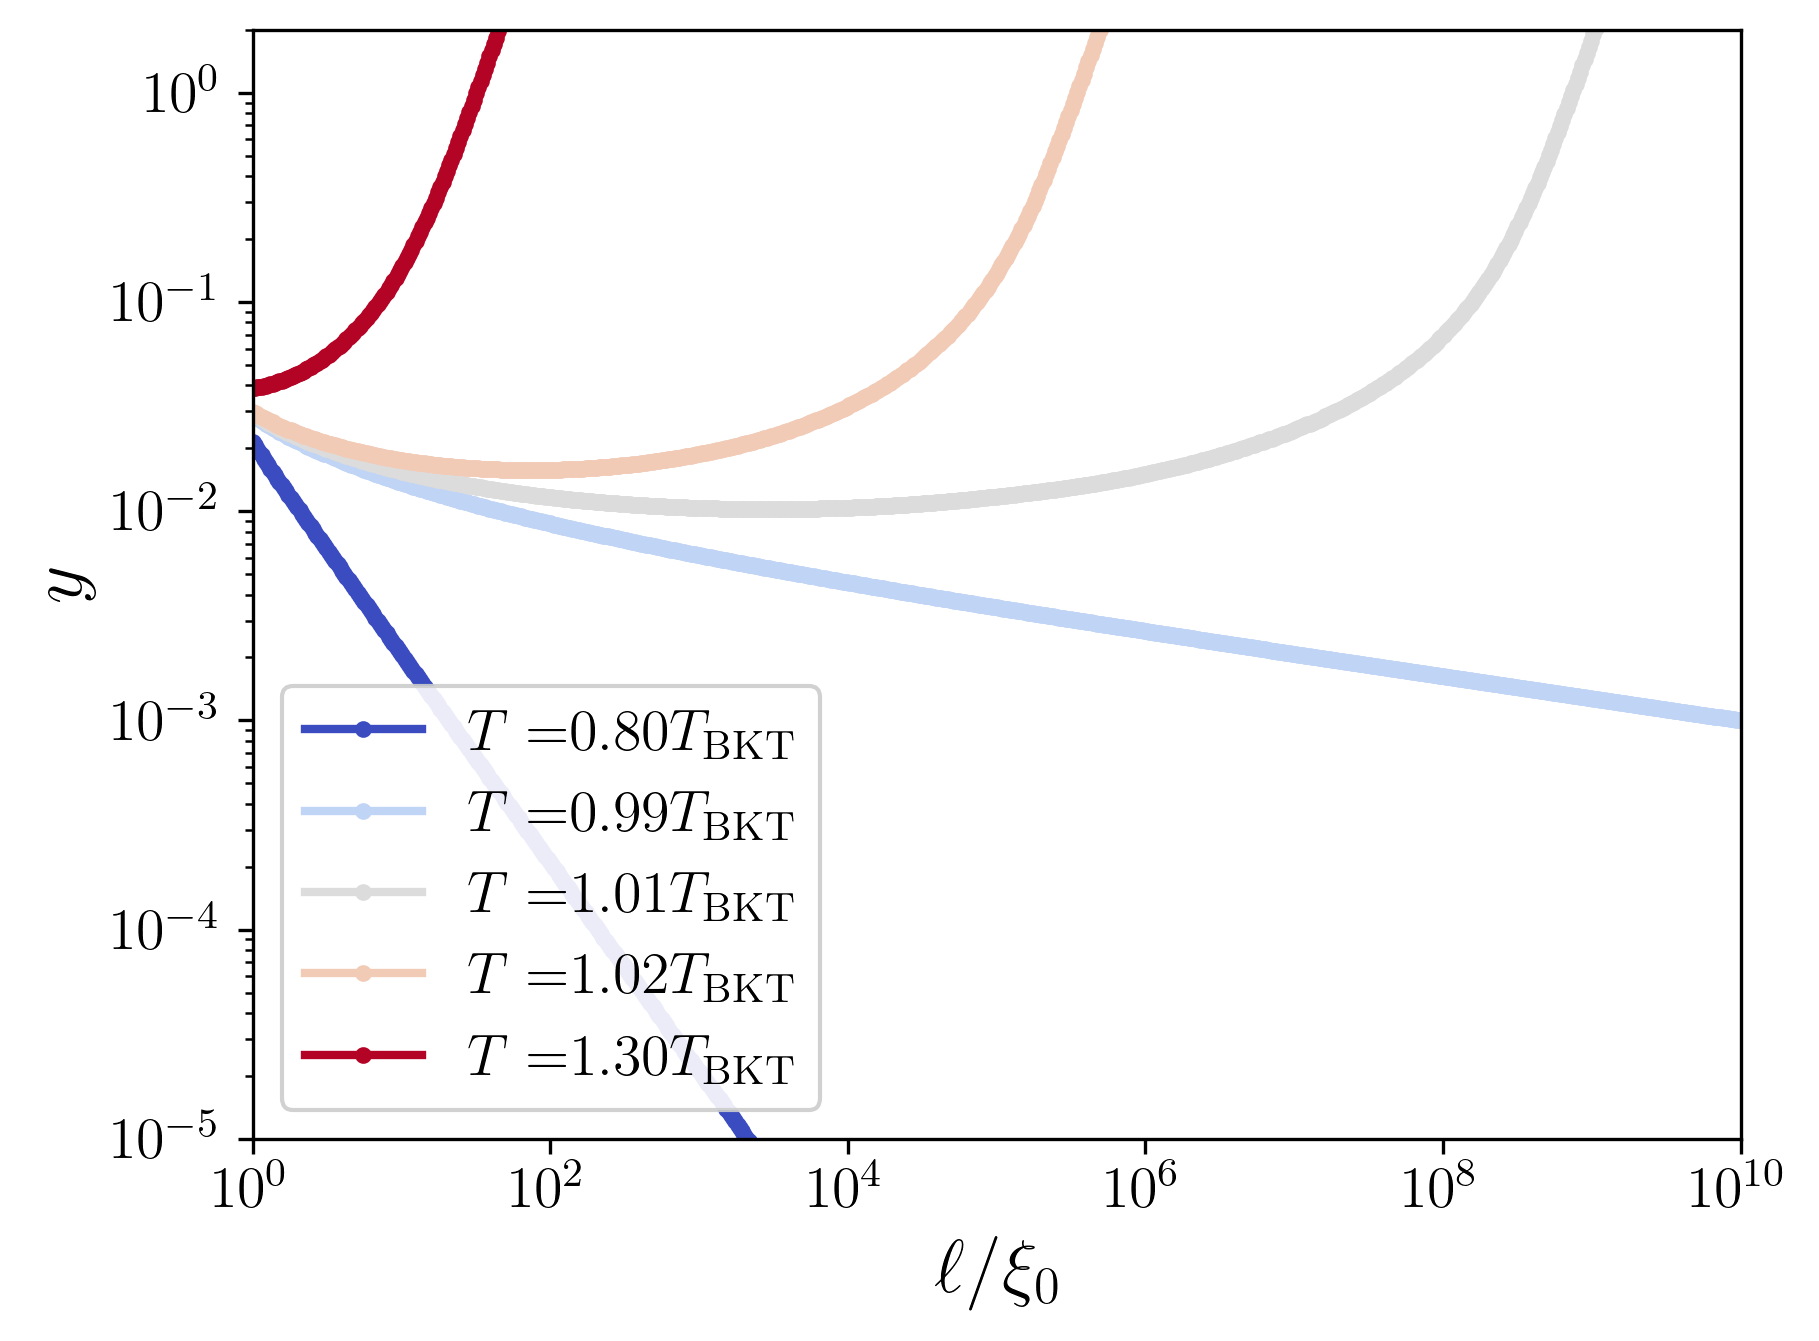

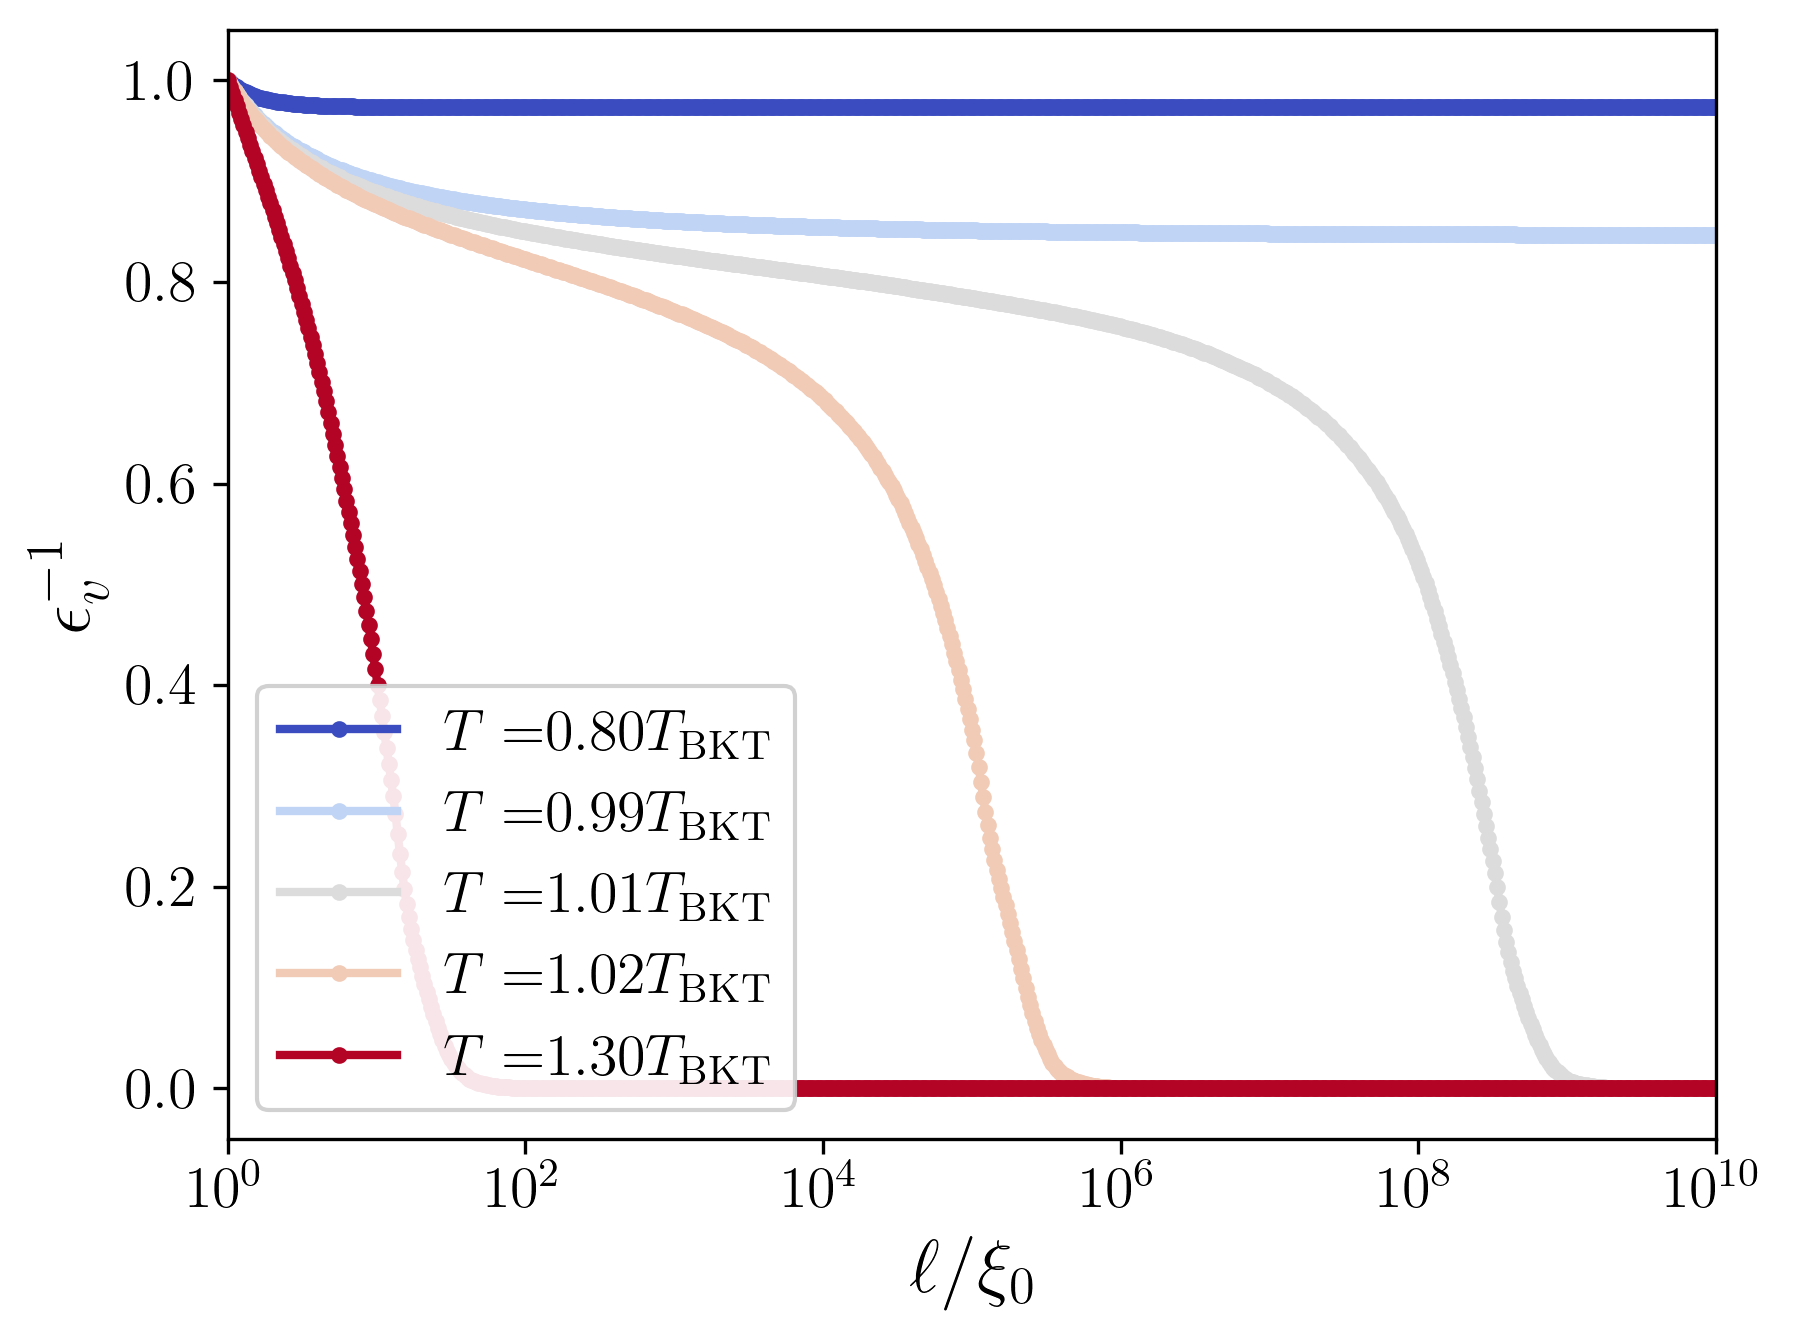

In [6]:
tindxs = [0,13,14,15,34]
nplot = len(tindxs)

#cs = cm.coolwarm([np.linspace(0.,1.,nplot)])
cs = cm.coolwarm([0.,.4,.5,.6,1.])
for nt in range(nplot):
    tindx = tindxs[nt]
    plt.plot(np.exp(logls),y_l[tindx,:],color=cs[nt],label=r'$T = $'+"{ratio:0.2f}".format(ratio=temps[tindx]/TBKT)+r'$T_{\rm BKT}$')

plt.legend(loc='lower left',framealpha=0.9)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$y$')
plt.xlabel(r'$\ell/\xi_0$')
plt.ylim(1e-5,2e0)
plt.xlim(1,1e10)

if saveFigs:
    plt.savefig(figDirectory+"y_vs_ell.pdf",bbox_inches='tight')
plt.show()

for nt in range(nplot):
    tindx = tindxs[nt]
    plt.plot(np.exp(logls),1./eps_l[tindx,:],color=cs[nt],label=r'$T = $'+"{ratio:0.2f}".format(ratio=temps[tindx]/TBKT)+r'$T_{\rm BKT}$')

plt.legend(loc='lower left',framealpha=0.9)
plt.xscale('log')
plt.ylabel(r'$\epsilon_v^{-1}$')
plt.xlabel(r'$\ell/\xi_0$')
plt.xlim(1,1e10)

if saveFigs:
    plt.savefig(figDirectory+"eps_vs_ell.pdf",bbox_inches='tight')
plt.show()

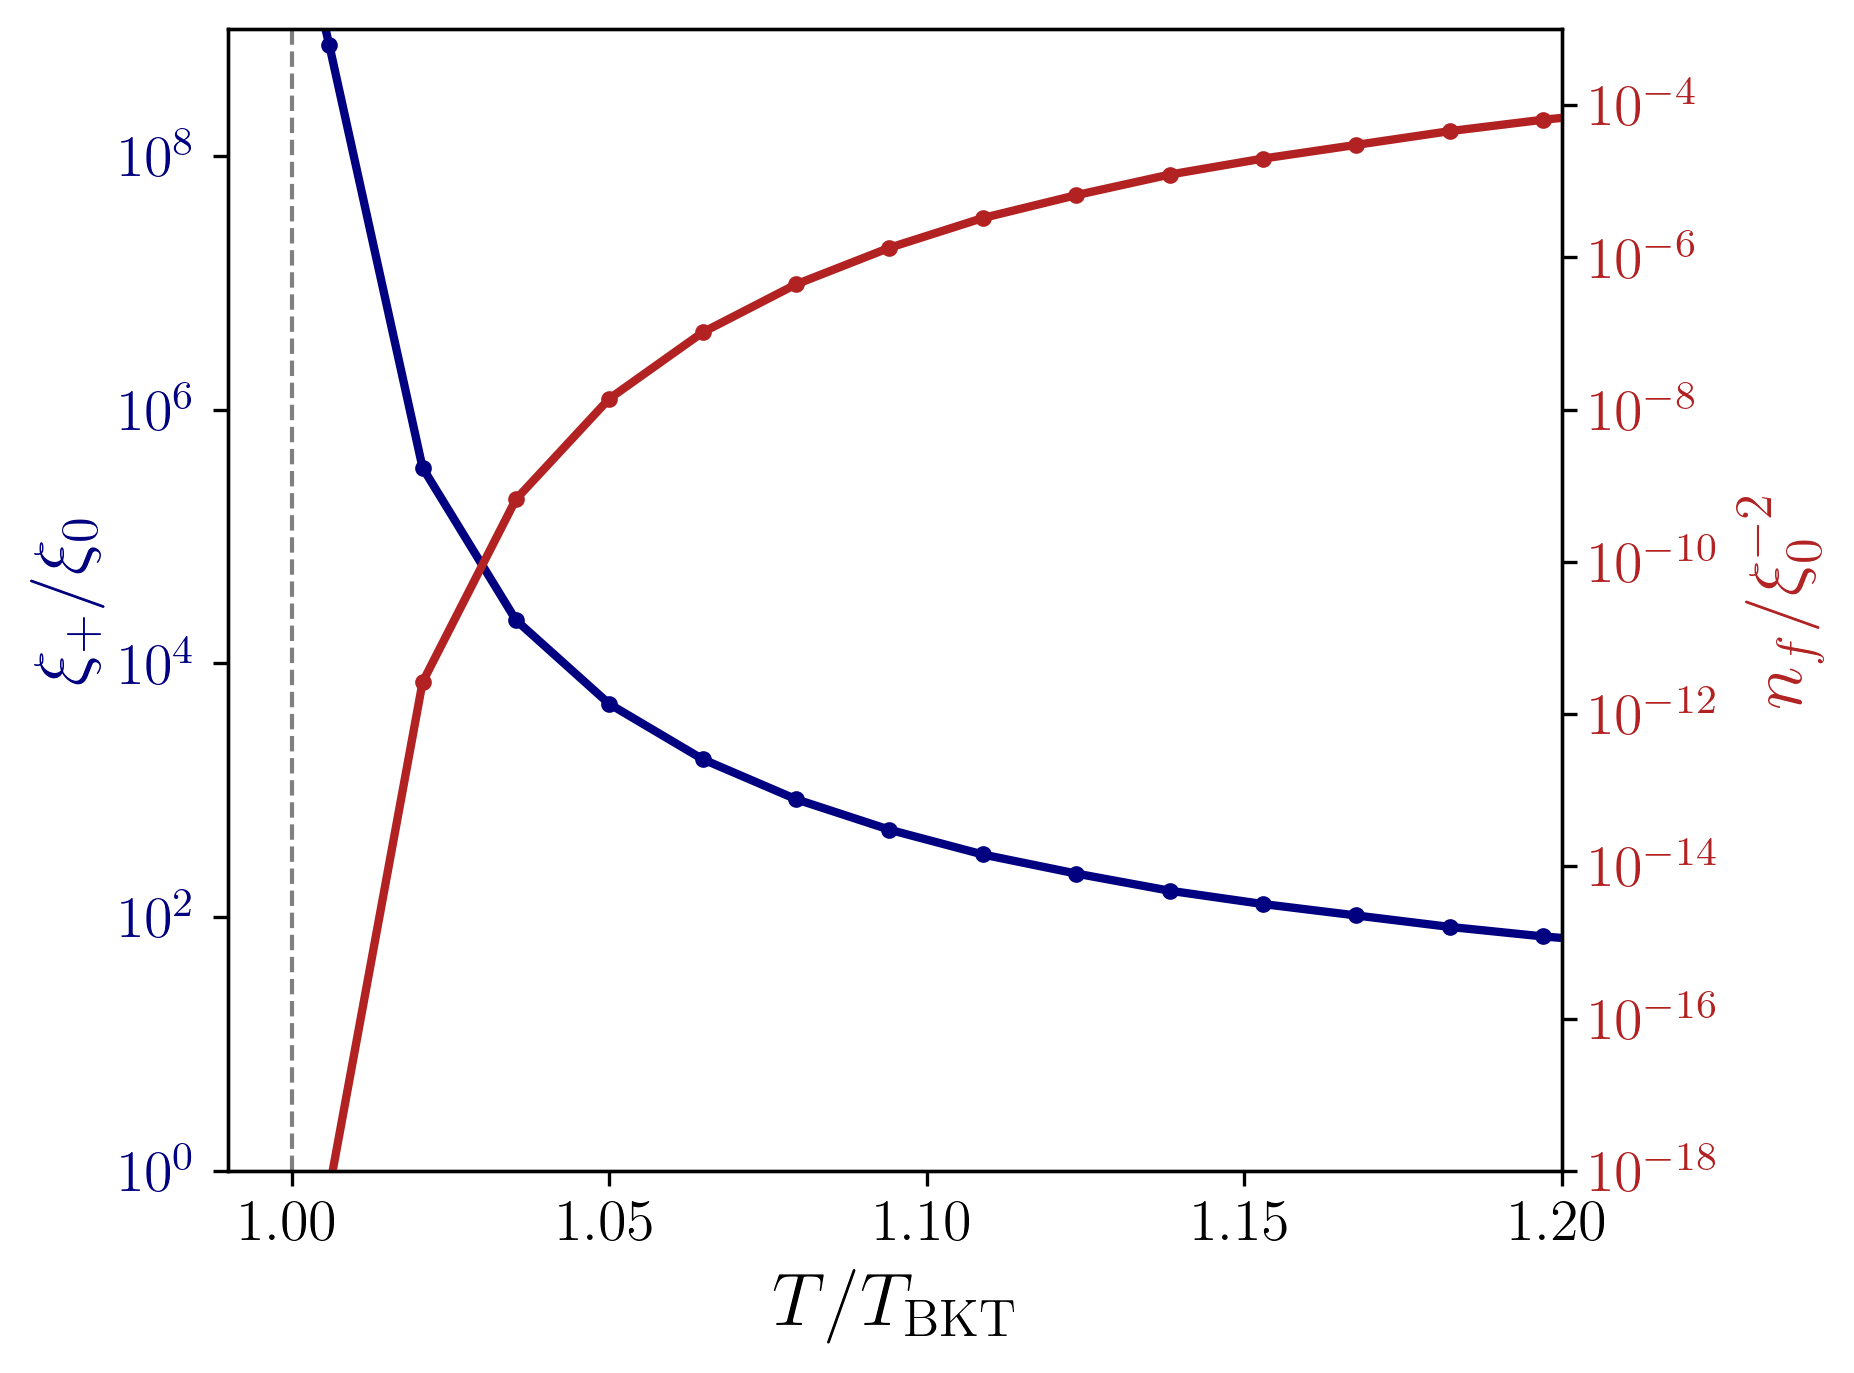

In [7]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r'$T/T_{\rm BKT}$')
ax1.set_ylabel(r'$\xi_+/\xi_0$',color=mclr.CSS4_COLORS['navy'])
ax1.plot(temps/TBKT,xis,color=mclr.CSS4_COLORS['navy'])
ax1.tick_params(axis='y',labelcolor=mclr.CSS4_COLORS['navy'])
ax1.set_yscale('log')
ax1.set_ylim(1e0,1e9)
ax1.set_xlim(0.99,1.2)

ax2 = ax1.twinx()
ax2.set_ylabel(r'$n_f/\xi_0^{-2}$',color=mclr.CSS4_COLORS['firebrick'])
ax2.plot(temps/TBKT,nfs,color=mclr.CSS4_COLORS['firebrick'])
ax2.tick_params(axis='y',labelcolor=mclr.CSS4_COLORS['firebrick'])
ax2.set_yscale('log')
ax2.set_ylim(1e-18,1e-3)

ax1.axvline(1.,color='gray',linestyle='dashed',linewidth=1.,marker='none')

fig.tight_layout()

if saveFigs:
    fig.savefig(figDirectory+"xi_nf_vs_temp.pdf",bbox_inches='tight')



1e-25


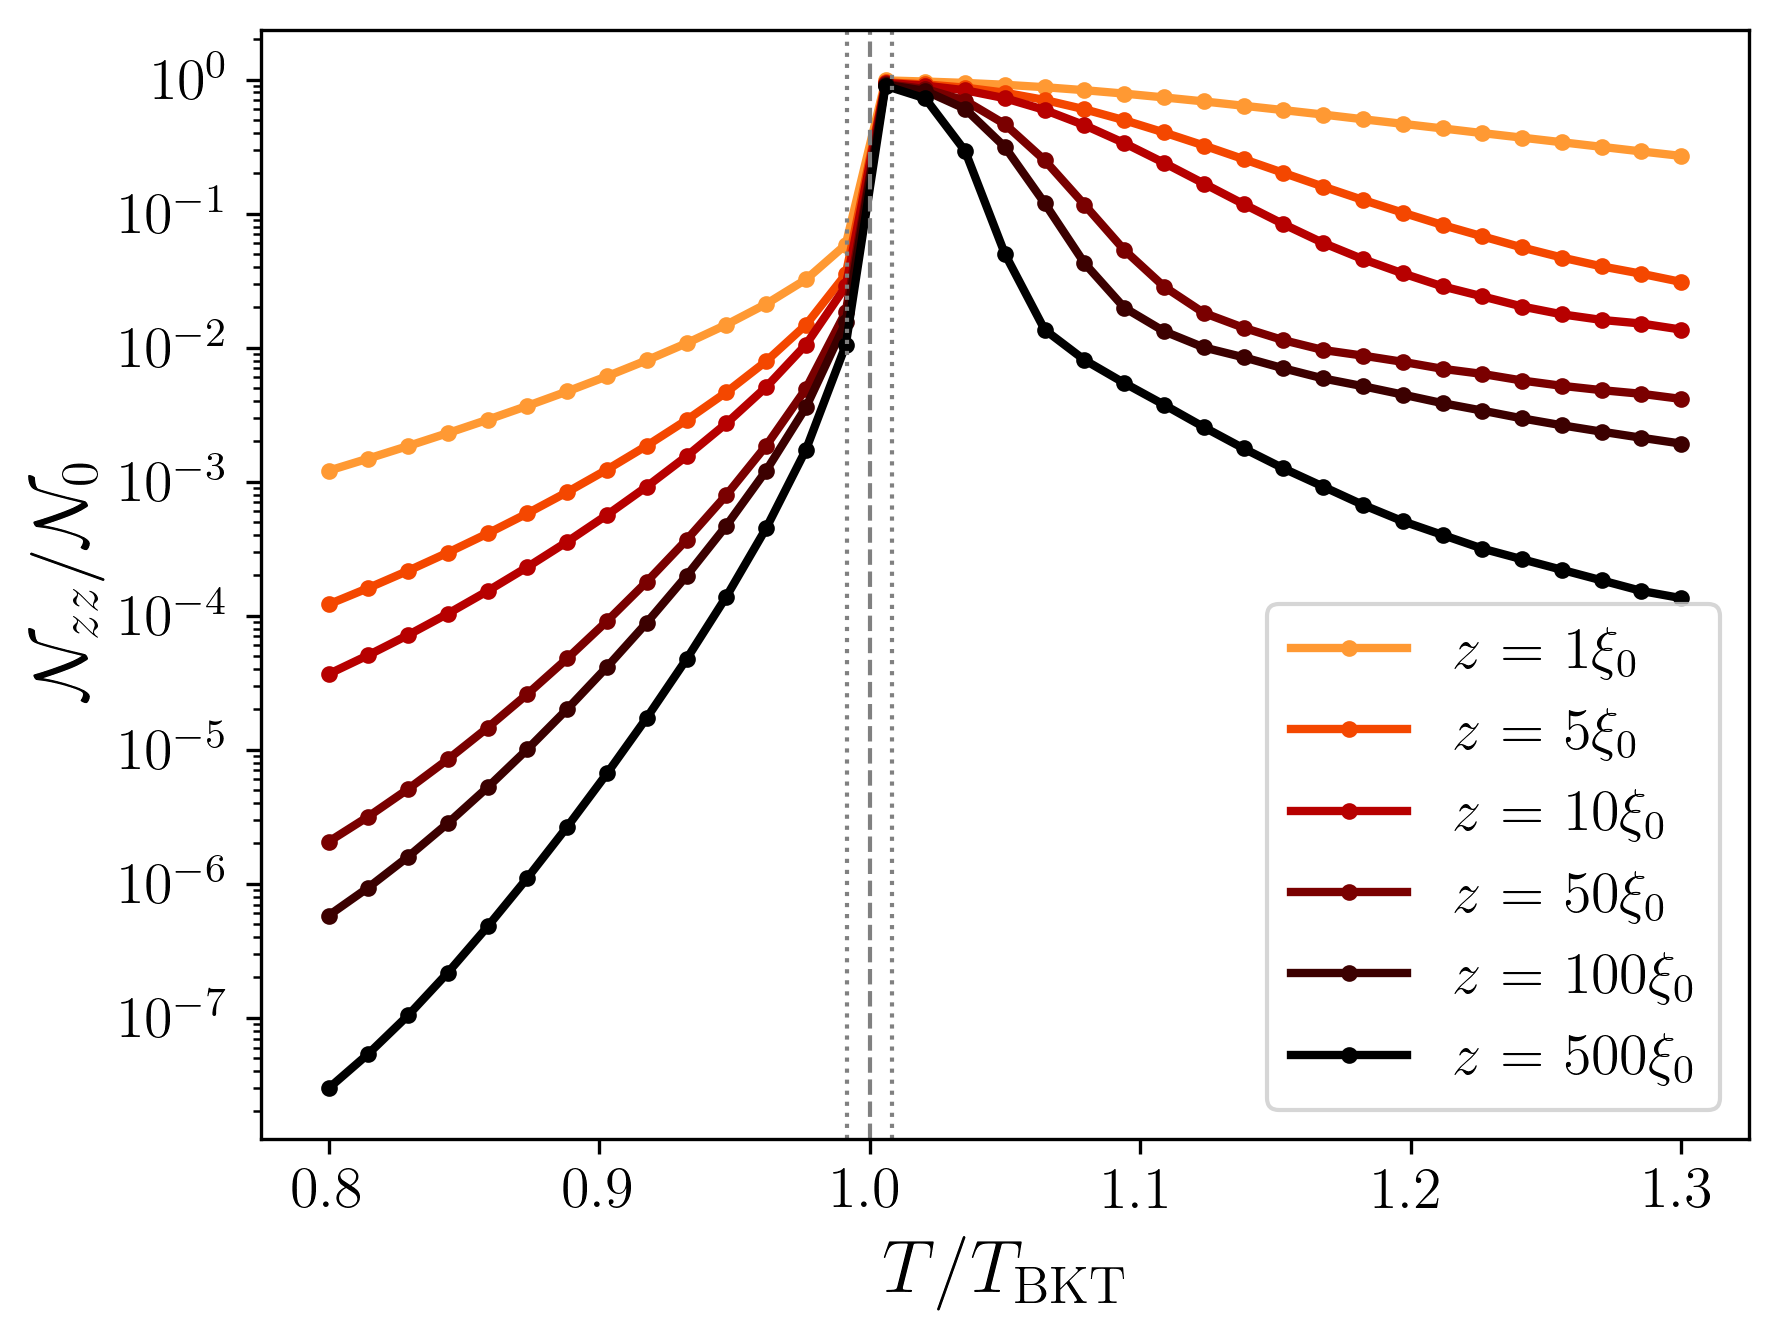

1e-08


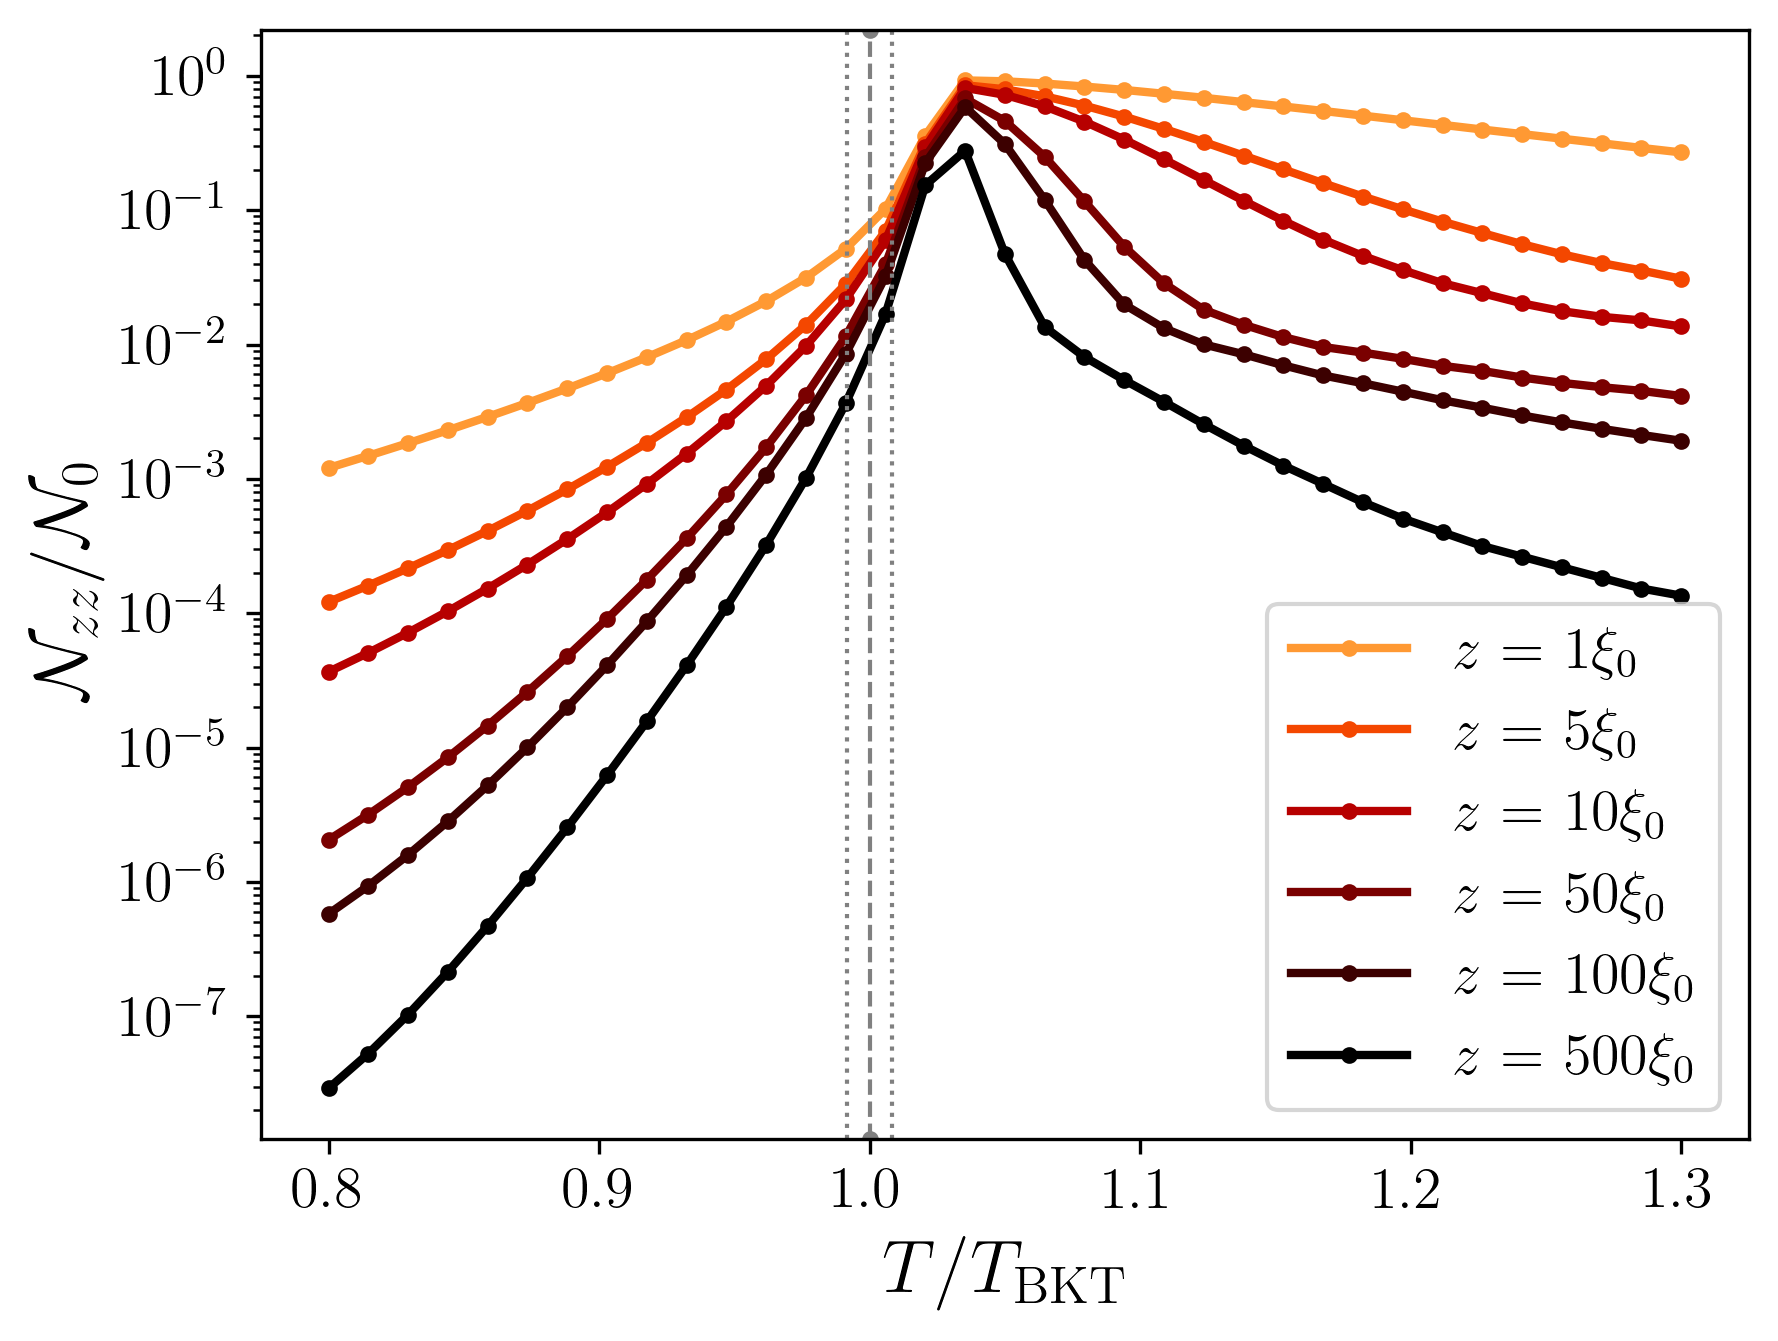

1e-05


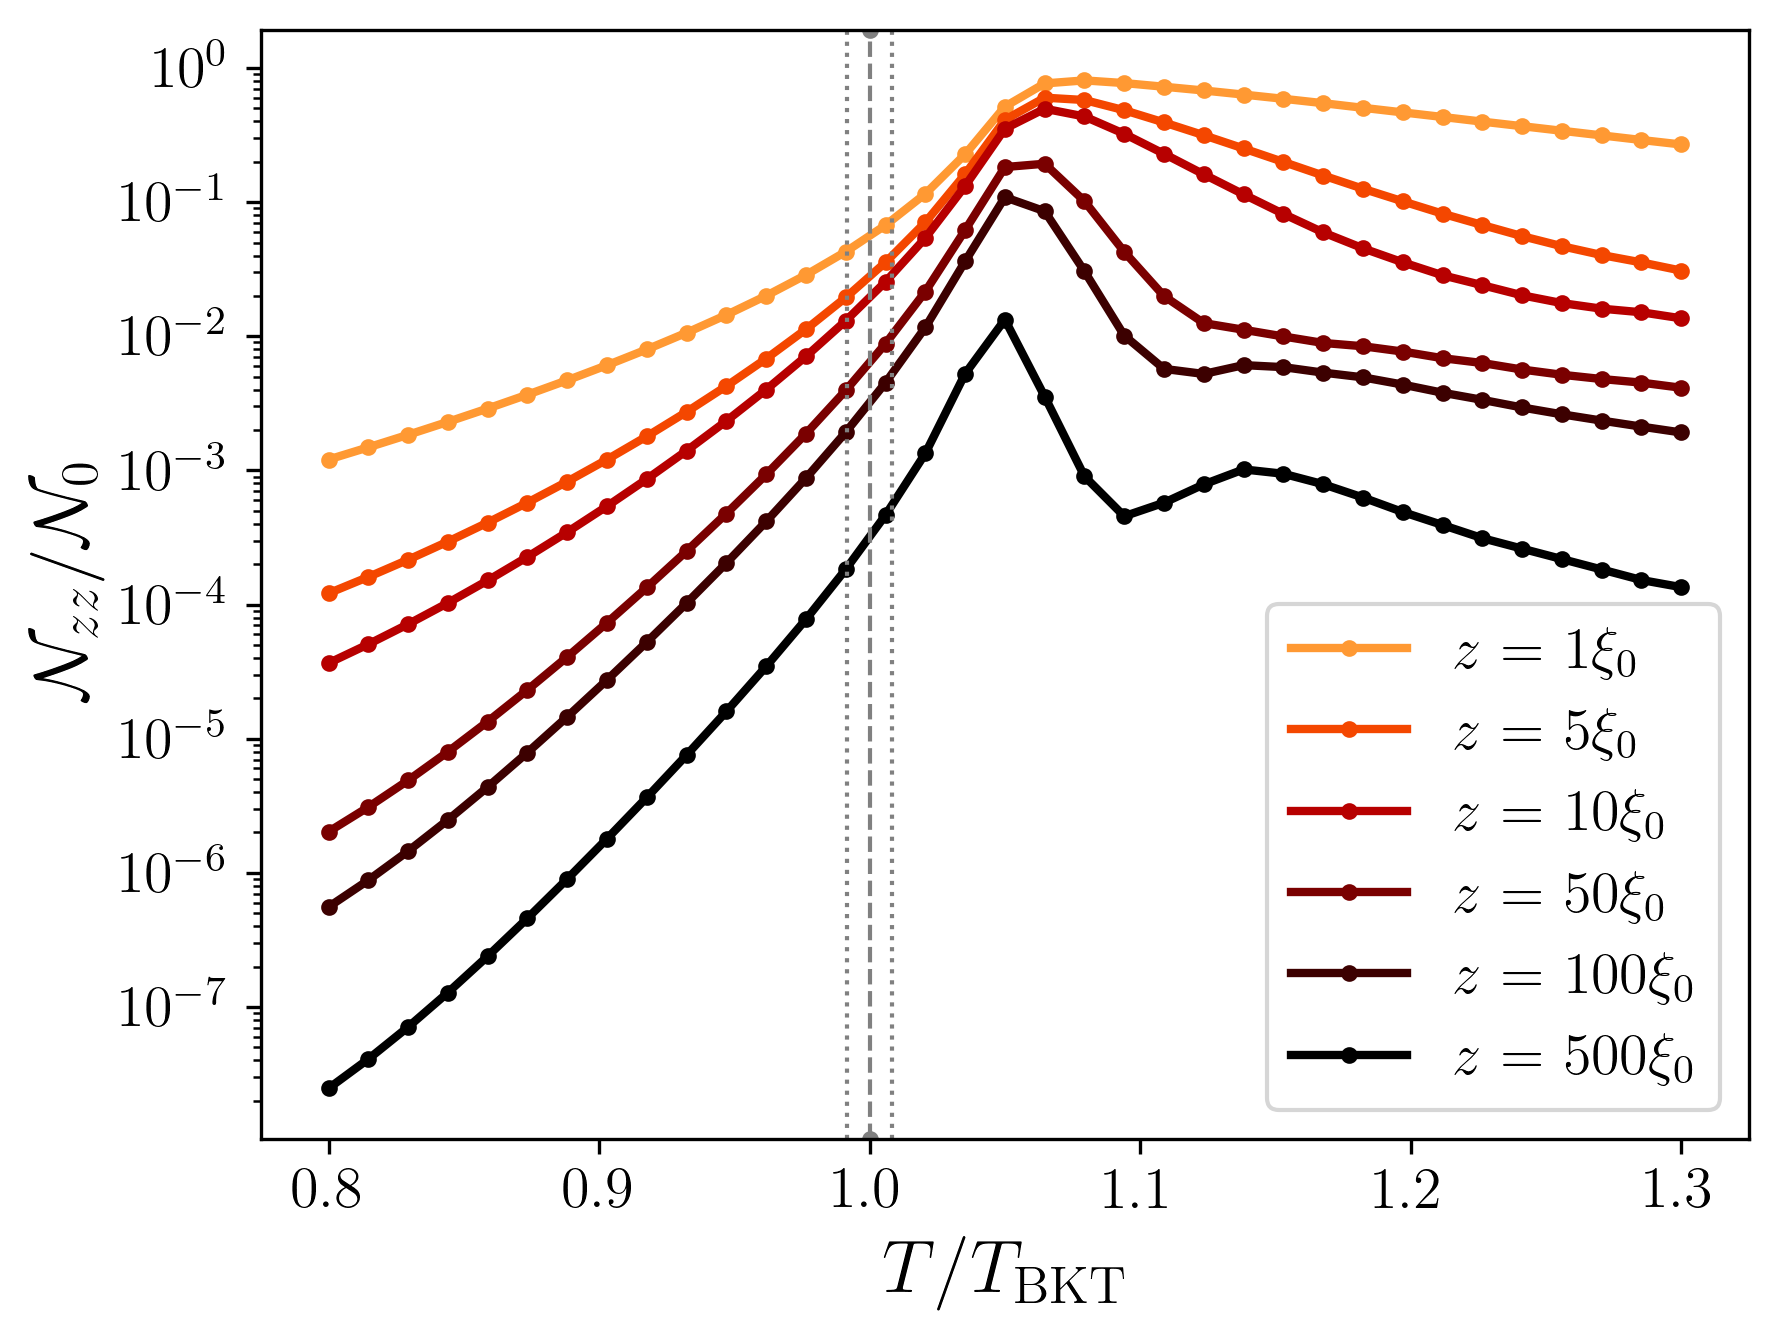

In [8]:
zindx = [0,2,3,5,6,8]
zpts = np.array([ zs[n] for n in zindx ])
windx = 0 
print(ws[windx]/muv)
cs = cm.gist_heat(np.linspace(0.8,0.,len(zindx)))

for n in range(len(zindx)):
    plt.plot(temps/TBKT,noise[:,zindx[n],windx],color=cs[n],label=r'$z$ = '+" {ratio:0.0f}".format(ratio=zpts[n])+r'$\xi_0$')
plt.axvline(1.,linestyle='dashed',color='gray',linewidth=1.,marker='none')
plt.axvline(1.+sigma_TBKT/TBKT,linestyle='dotted',color='gray',linewidth=1.,marker='none')
plt.axvline(1.-sigma_TBKT/TBKT,linestyle='dotted',color='gray',linewidth=1.,marker='none')
plt.legend()
plt.xlabel(r'$T/T_{\rm BKT}$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_temp_w=1e-25.pdf",bbox_inches='tight')

plt.show()

windx = 1
print(ws[windx]/muv)

for n in range(len(zindx)):
    plt.plot(temps/TBKT,noise[:,zindx[n],windx],color=cs[n],label=r'$z$ = '+" {ratio:0.0f}".format(ratio=zpts[n])+r'$\xi_0$')
plt.axvline(1.,linestyle='dashed',color='gray',linewidth=1.)
plt.axvline(1.+sigma_TBKT/TBKT,linestyle='dotted',color='gray',linewidth=1.,marker='none')
plt.axvline(1.-sigma_TBKT/TBKT,linestyle='dotted',color='gray',linewidth=1.,marker='none')
plt.legend()
plt.xlabel(r'$T/T_{\rm BKT}$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_temp_w=1e-8.pdf",bbox_inches='tight')

plt.show()

windx = 7
print(ws[windx]/muv)

for n in range(len(zindx)):
    plt.plot(temps/TBKT,noise[:,zindx[n],windx],color=cs[n],label=r'$z$ = '+" {ratio:0.0f}".format(ratio=zpts[n])+r'$\xi_0$')
plt.axvline(1.,linestyle='dashed',color='gray',linewidth=1.)
plt.axvline(1.+sigma_TBKT/TBKT,linestyle='dotted',color='gray',linewidth=1.,marker='none')
plt.axvline(1.-sigma_TBKT/TBKT,linestyle='dotted',color='gray',linewidth=1.,marker='none')
plt.legend()
plt.xlabel(r'$T/T_{\rm BKT}$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_temp_w=1e-5.pdf",bbox_inches='tight')

plt.show()

1e-25


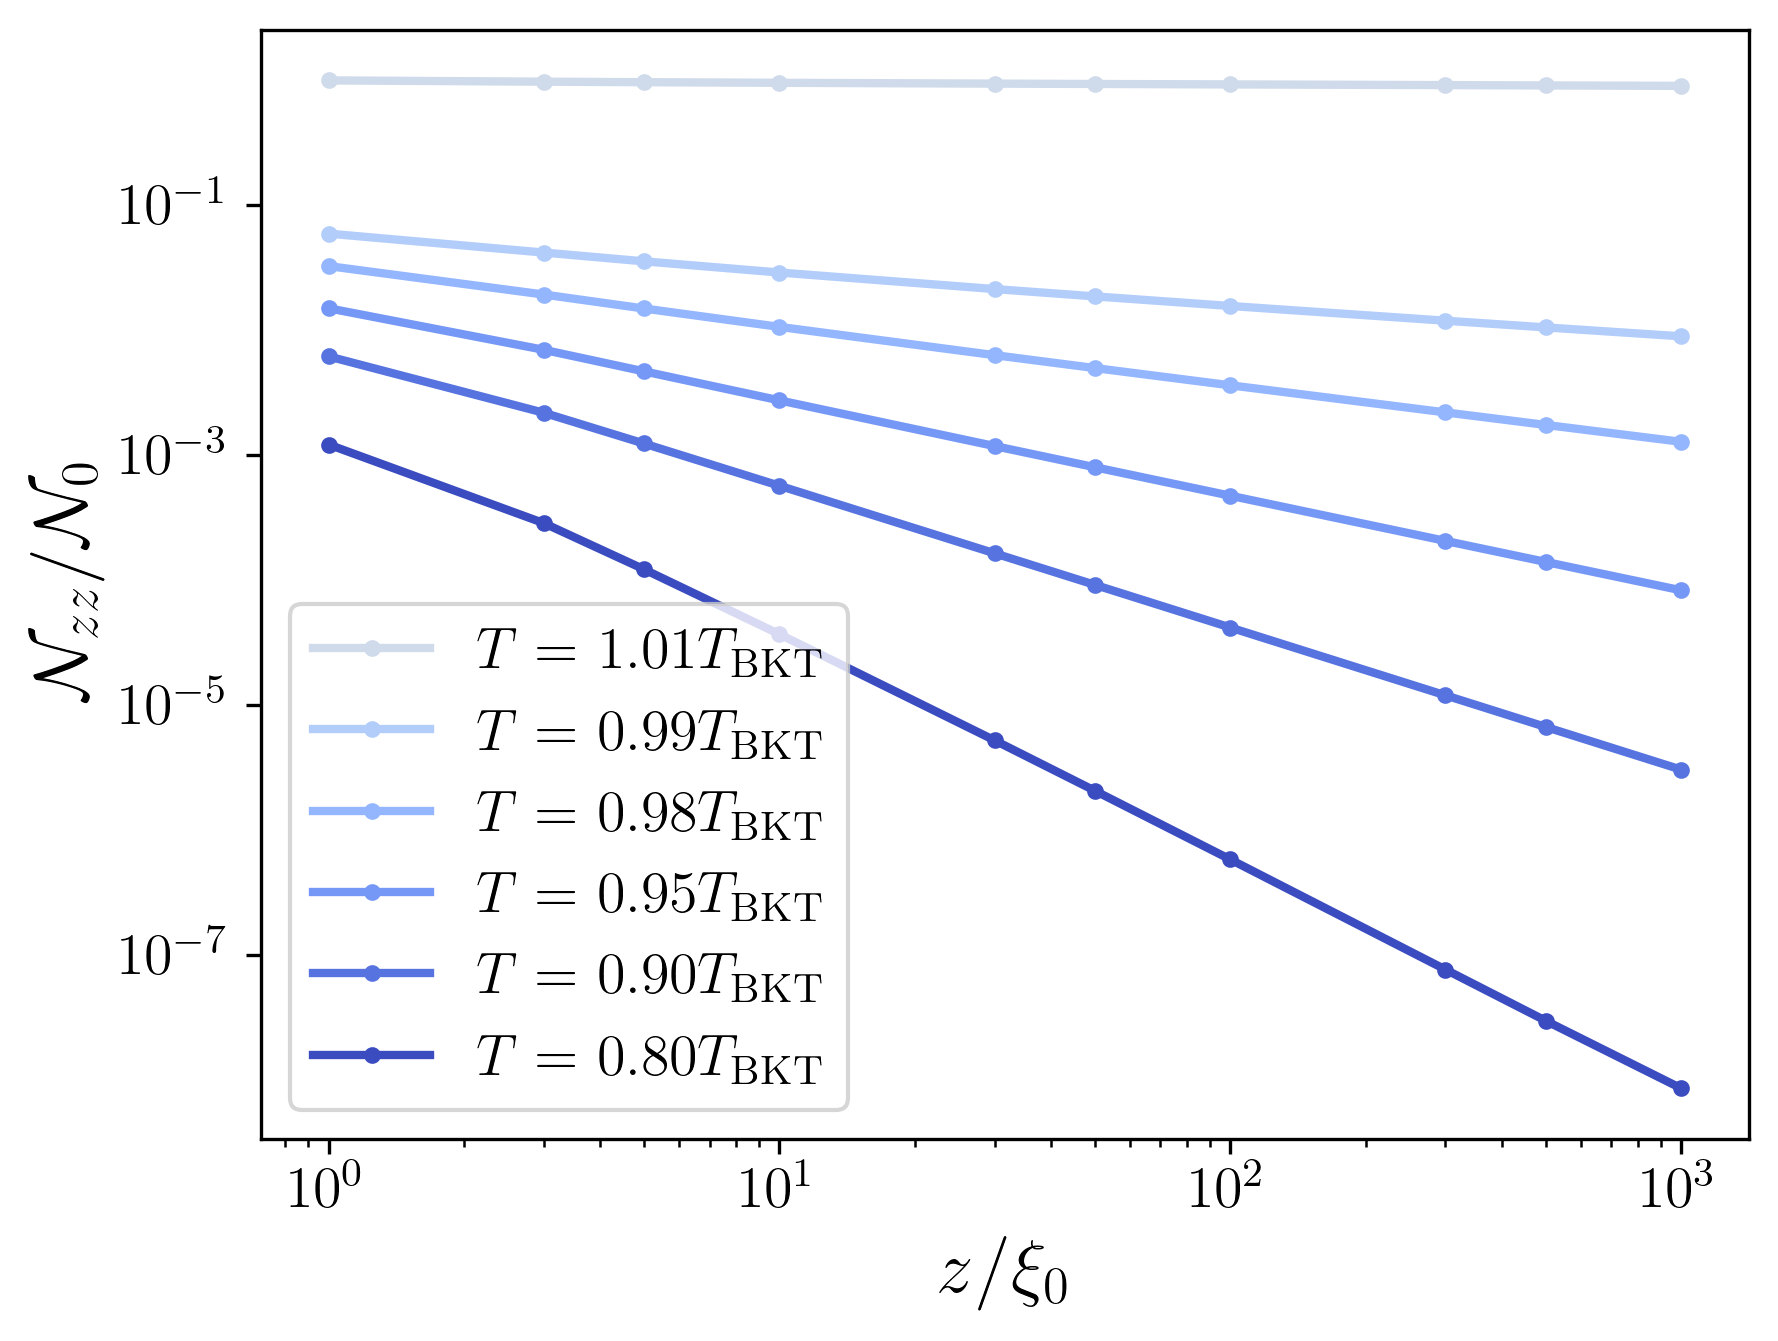

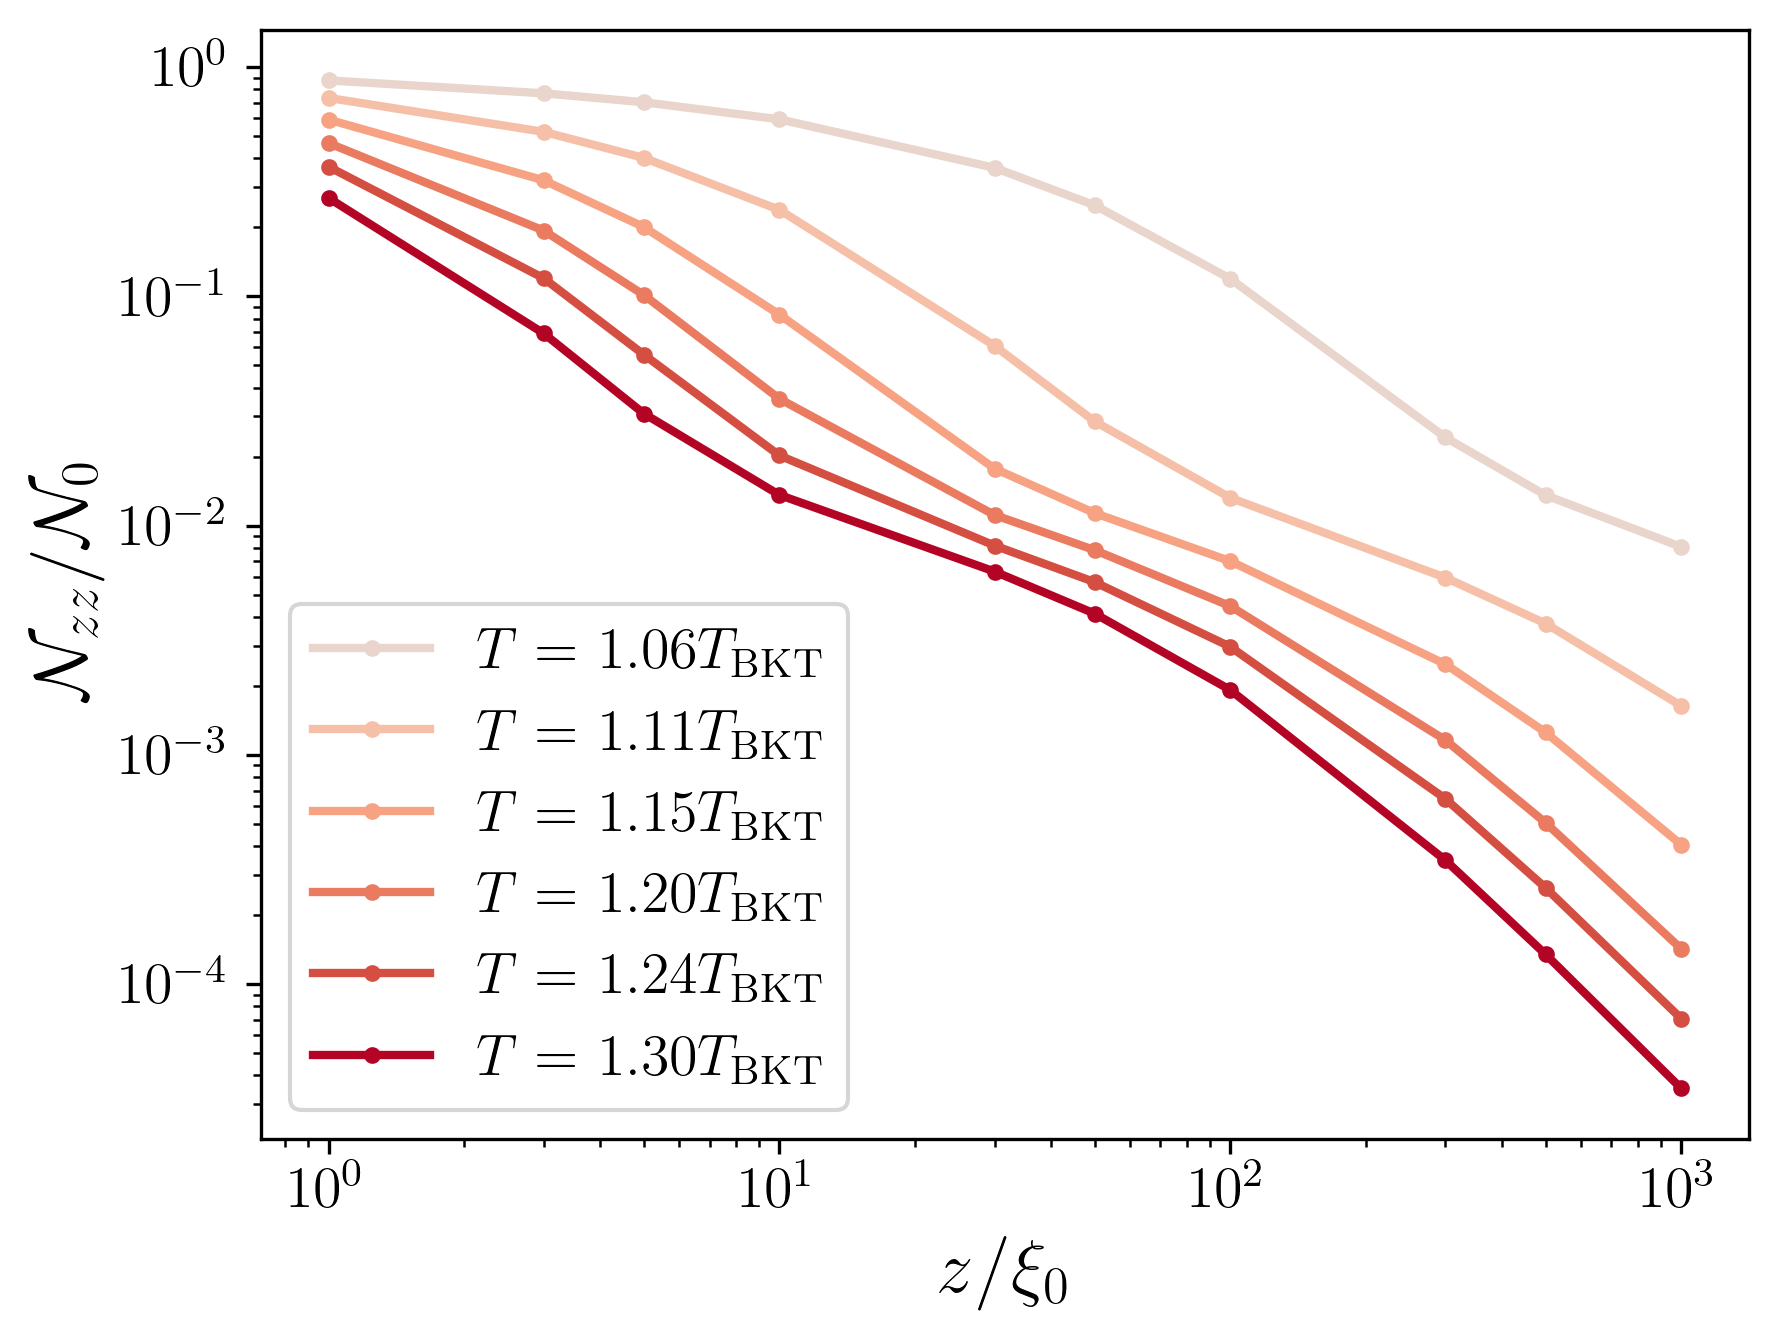

In [9]:
windx = 0
print(ws[windx]/muv)

tindxs = [14,13,12,10,7,0]
cs = cm.coolwarm(np.linspace(0.,0.45,len(tindxs)))

i=0
for tindx in tindxs:
    t = temps[tindx]
    plt.plot(zs[:-1],noise[tindx,:-1,windx],color=cs[-1-i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=t/TBKT)+r'$T_{\rm BKT}$')
    i+=1

    
plt.legend(loc='lower left')
plt.xlabel(r'$z/\xi_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_z_low_temp_w=1e-25.pdf",bbox_inches='tight')

plt.show()

#############

tindxs = [18,21,24,27,30,34]

cs = cm.coolwarm(np.linspace(0.55,1.,len(tindxs)))

i=0
for tindx in tindxs:
    t = temps[tindx]
    plt.plot(zs[:-1],noise[tindx,:-1,windx],color=cs[i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=t/TBKT)+r'$T_{\rm BKT}$')
    i+=1
    
plt.legend(loc='lower left')
plt.xlabel(r'$z/\xi_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_z_high_temp_w=1e-25.pdf",bbox_inches='tight')

plt.show()


0.0001


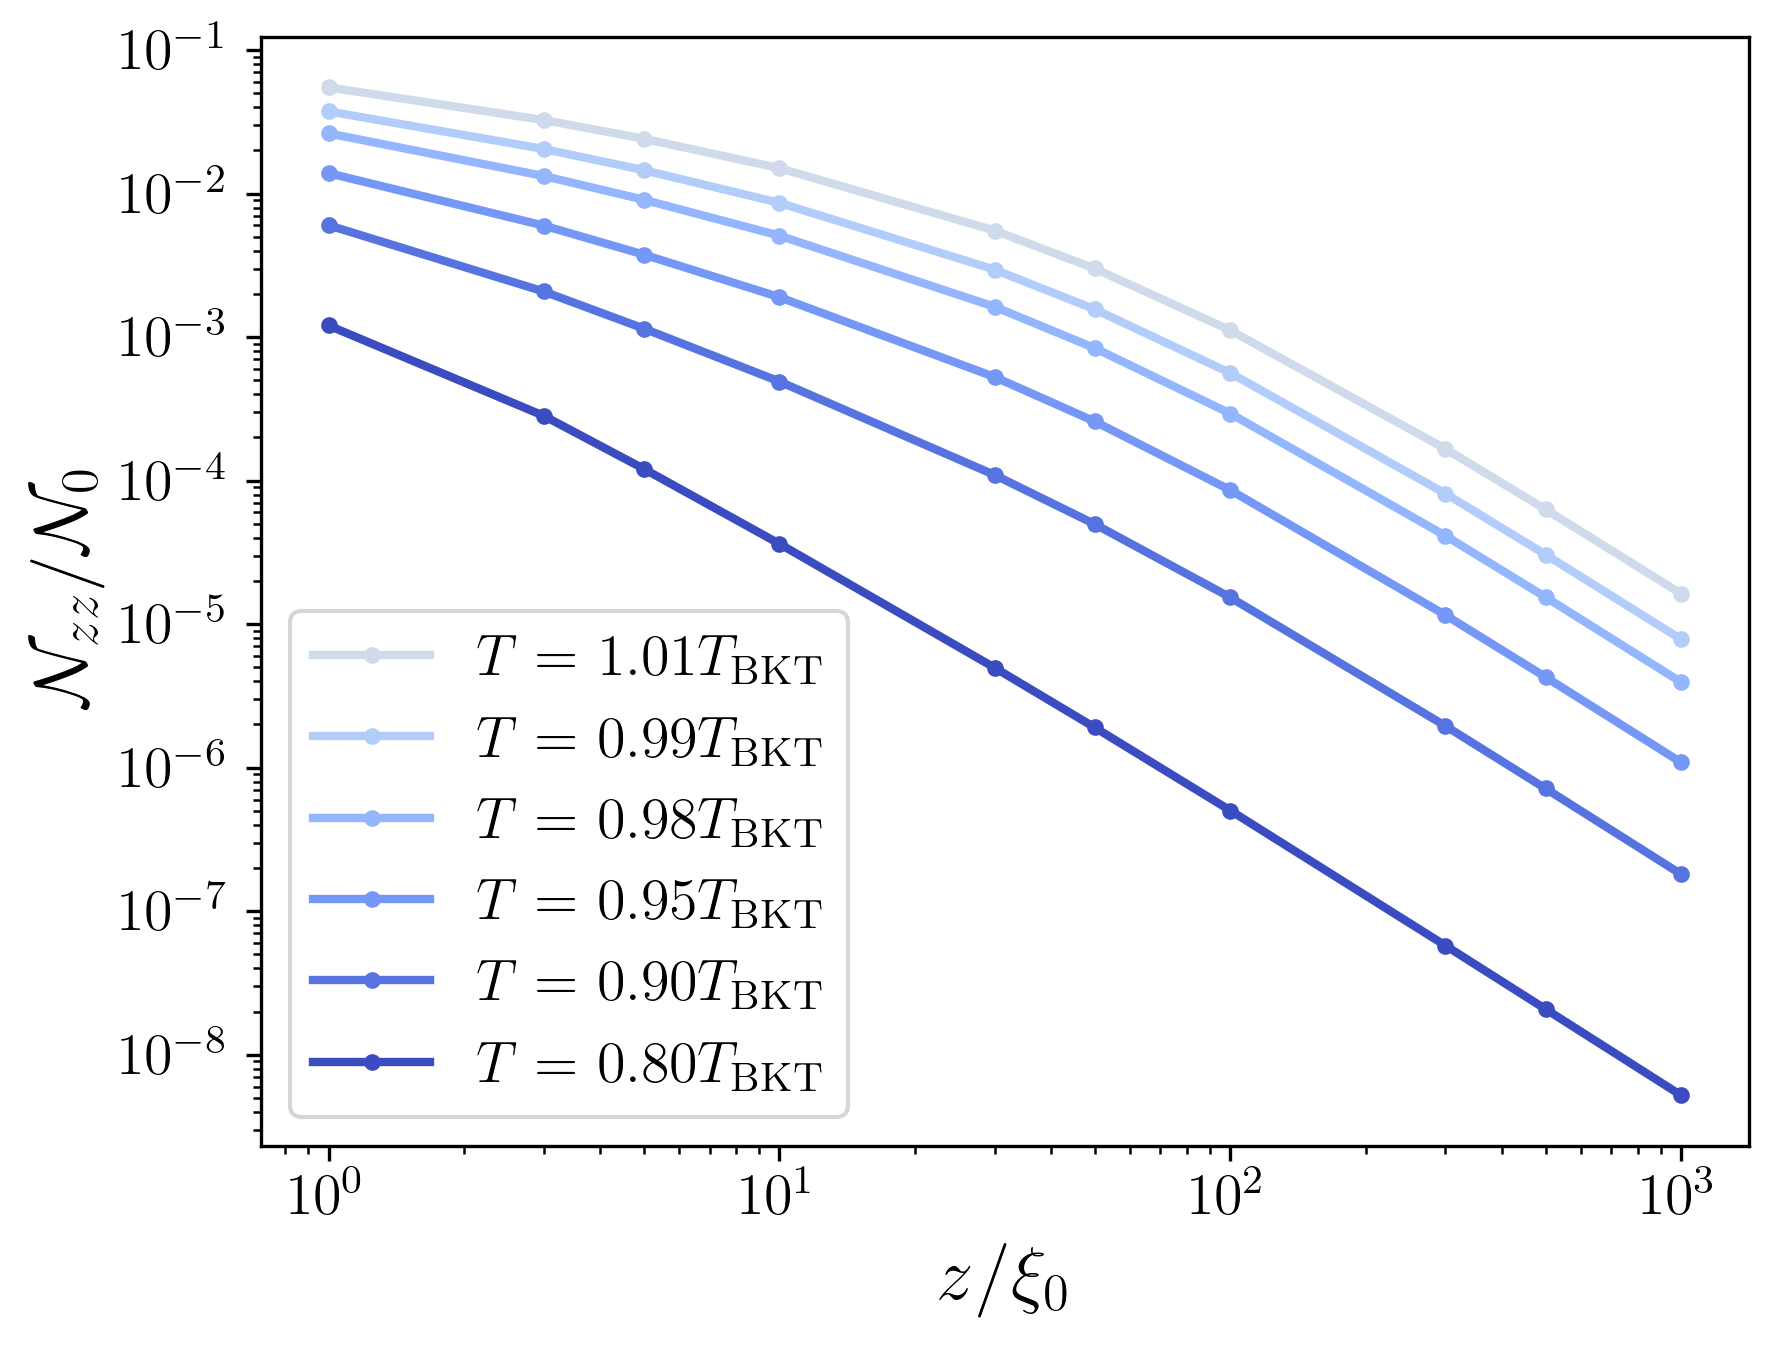

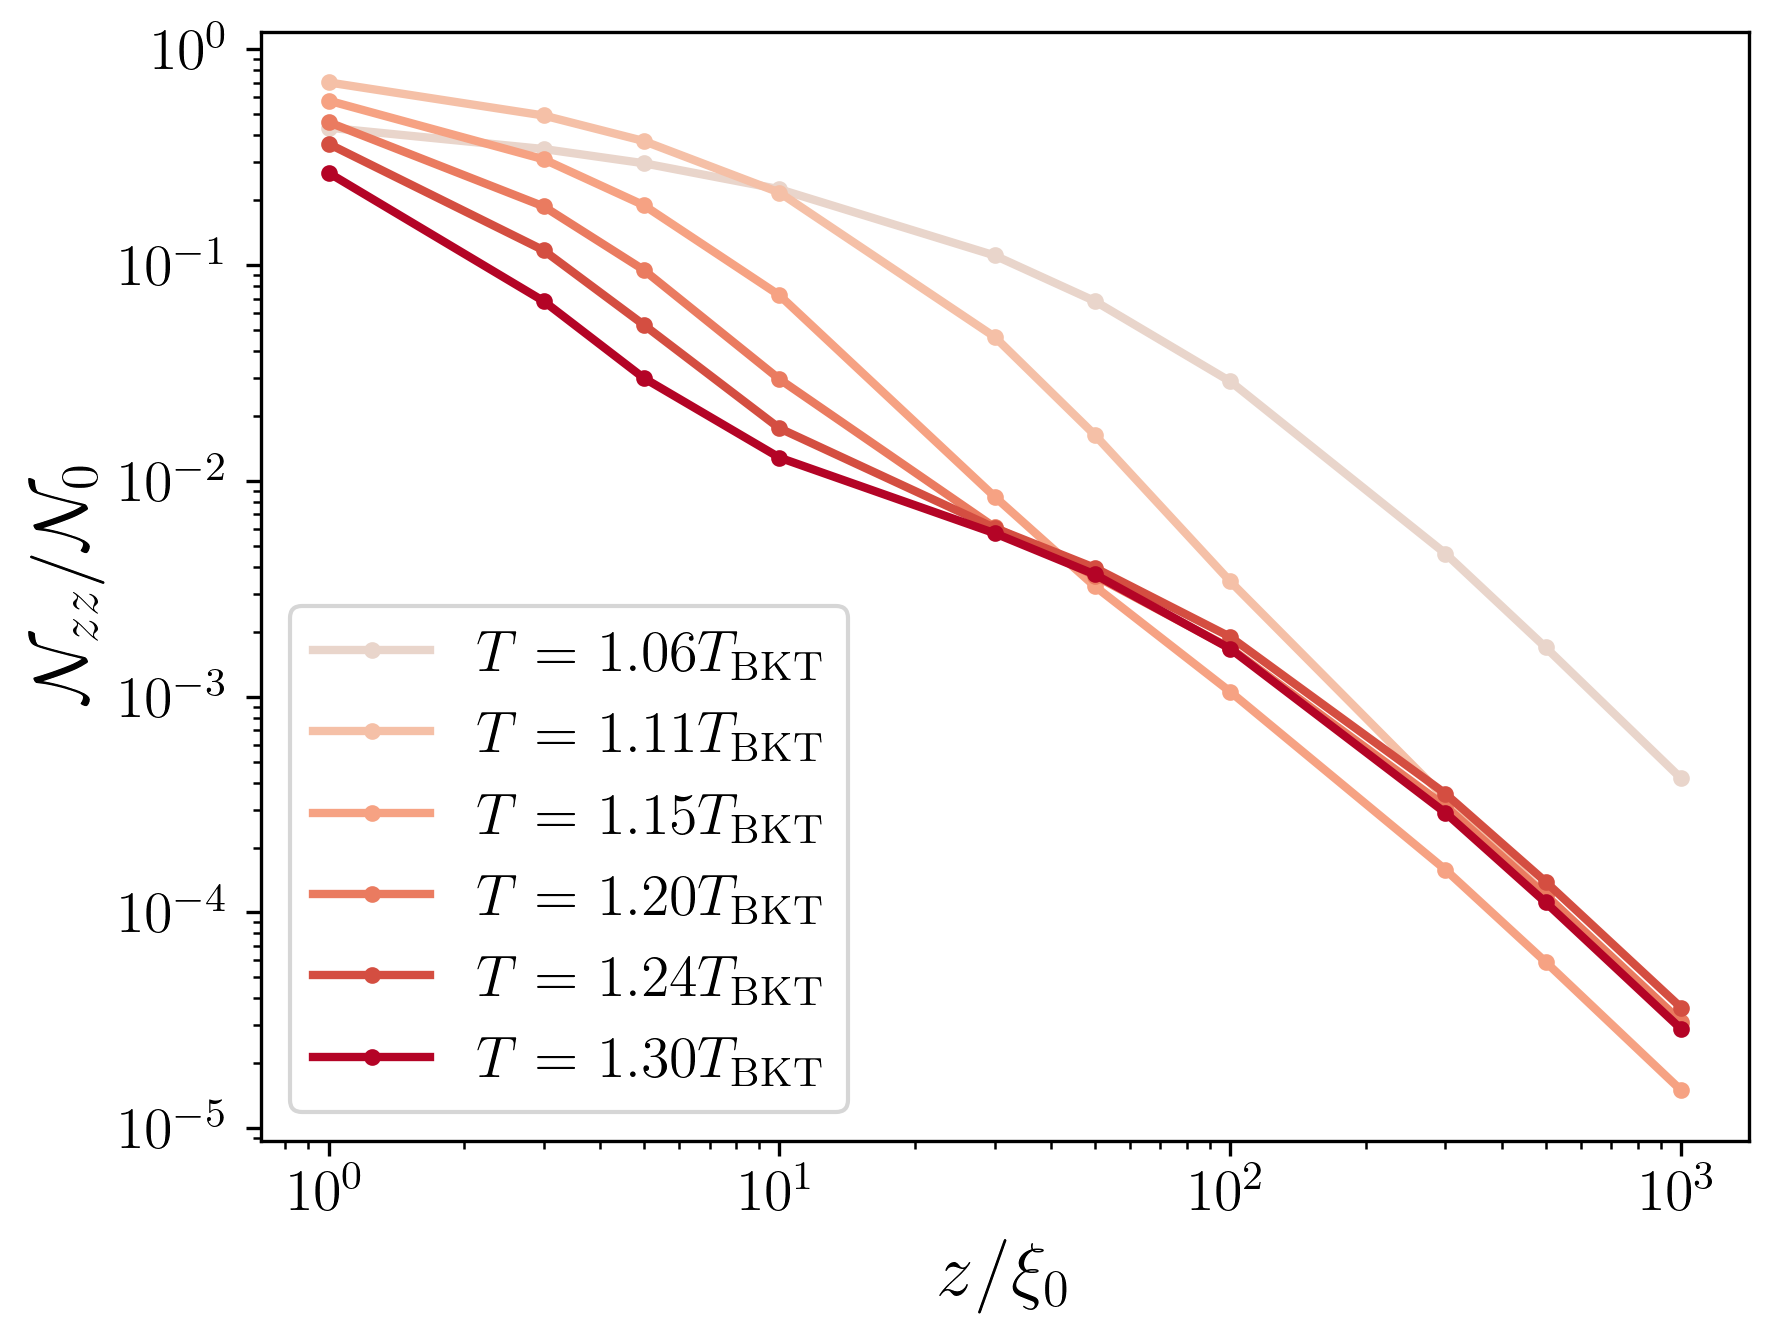

In [10]:
windx = 9
print(ws[windx]/muv)

tindxs = [14,13,12,10,7,0]
cs = cm.coolwarm(np.linspace(0.,0.45,len(tindxs)))

i=0
for tindx in tindxs:
    t = temps[tindx]
    plt.plot(zs[:-1],noise[tindx,:-1,windx],color=cs[-1-i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=t/TBKT)+r'$T_{\rm BKT}$')
    i+=1

    
plt.legend(loc='lower left')
plt.xlabel(r'$z/\xi_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_z_low_temp_w=1e-4.pdf",bbox_inches='tight')

plt.show()

#############

tindxs = [18,21,24,27,30,34]

cs = cm.coolwarm(np.linspace(0.55,1.,len(tindxs)))

i=0
for tindx in tindxs:
    t = temps[tindx]
    plt.plot(zs[:-1],noise[tindx,:-1,windx],color=cs[i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=t/TBKT)+r'$T_{\rm BKT}$')
    i+=1
    
plt.legend(loc='lower left')
plt.xlabel(r'$z/\xi_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_z_high_temp_w=1e-4.pdf",bbox_inches='tight')

plt.show()


3.0


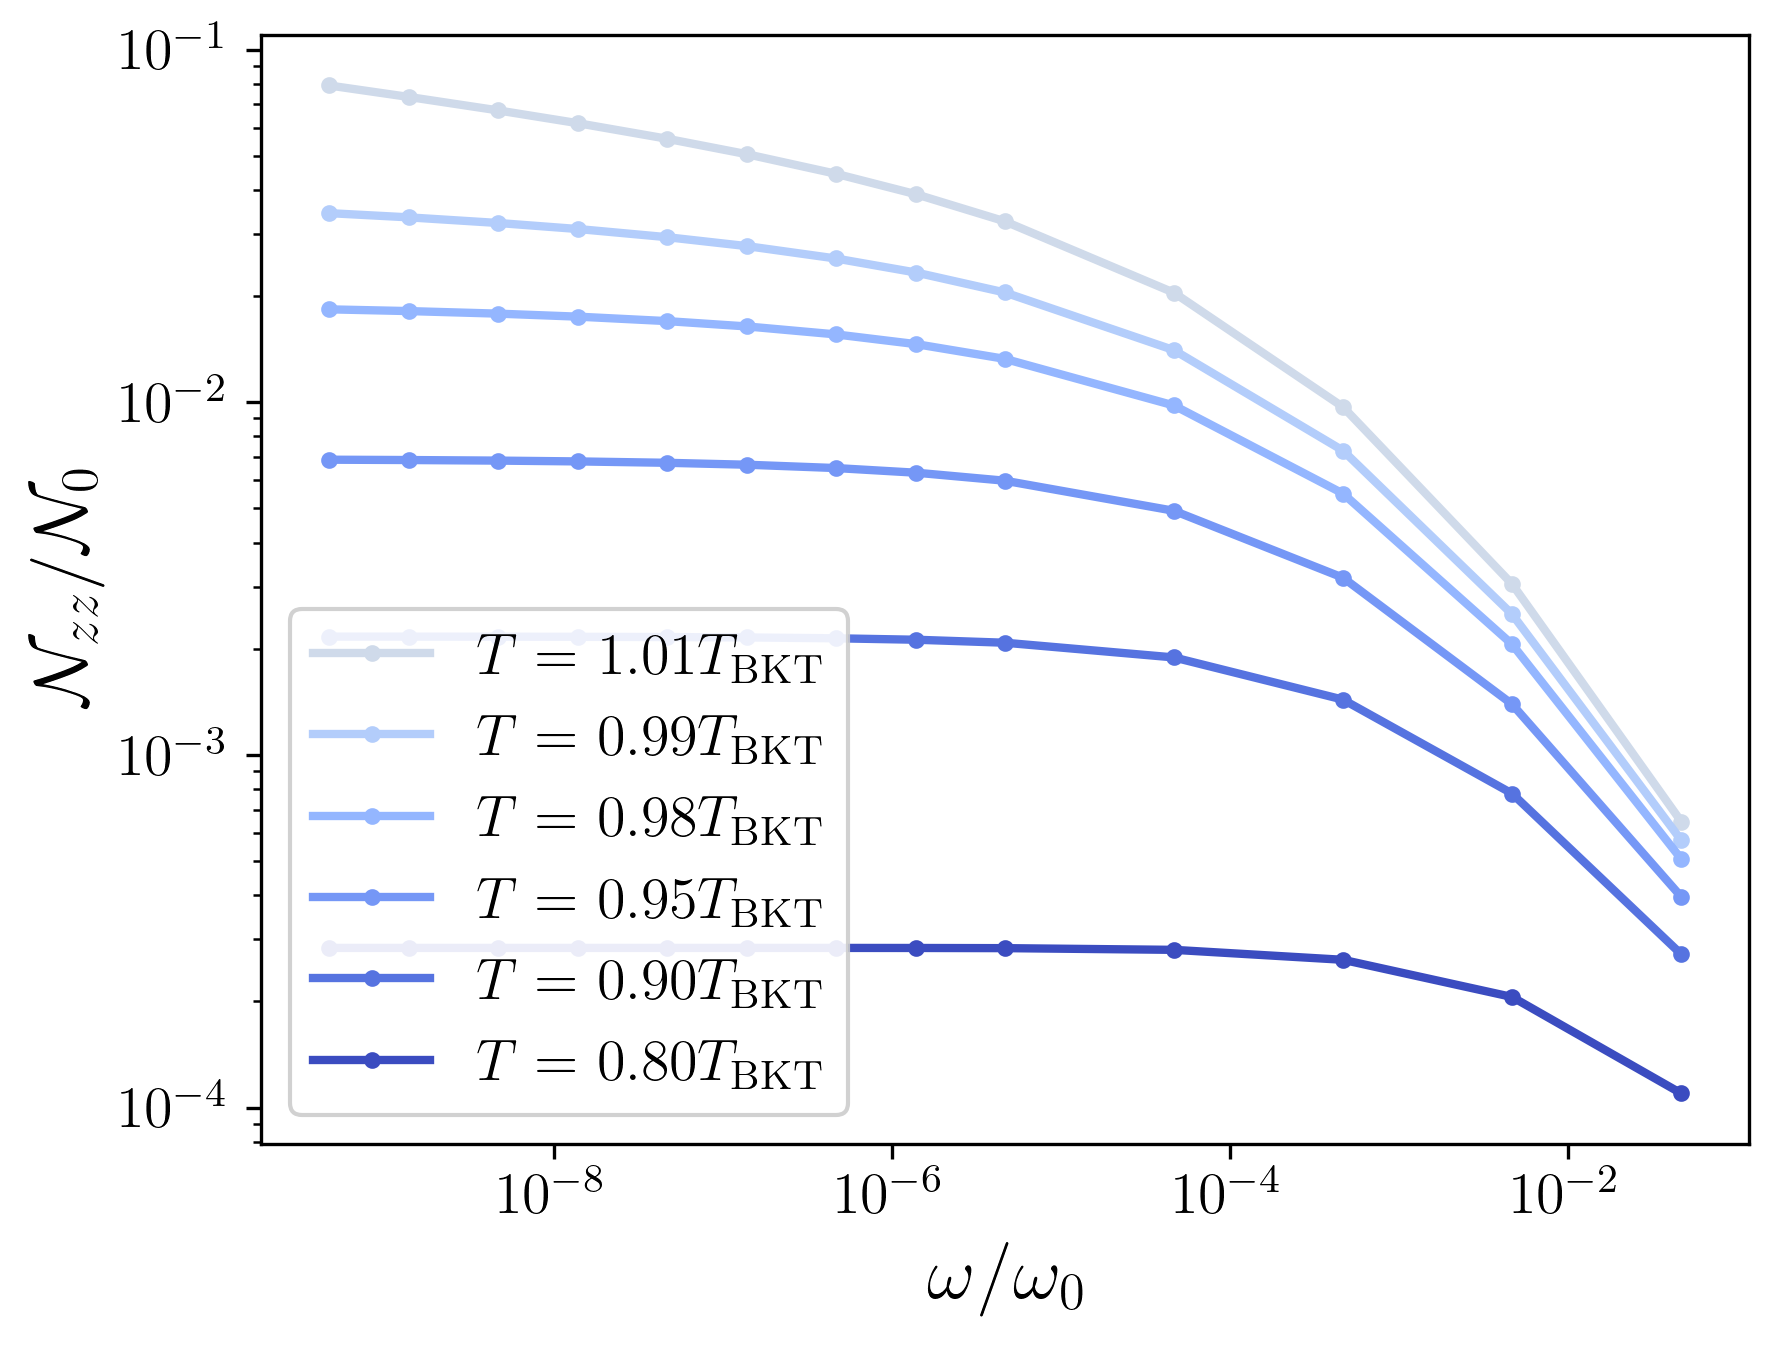

300.0


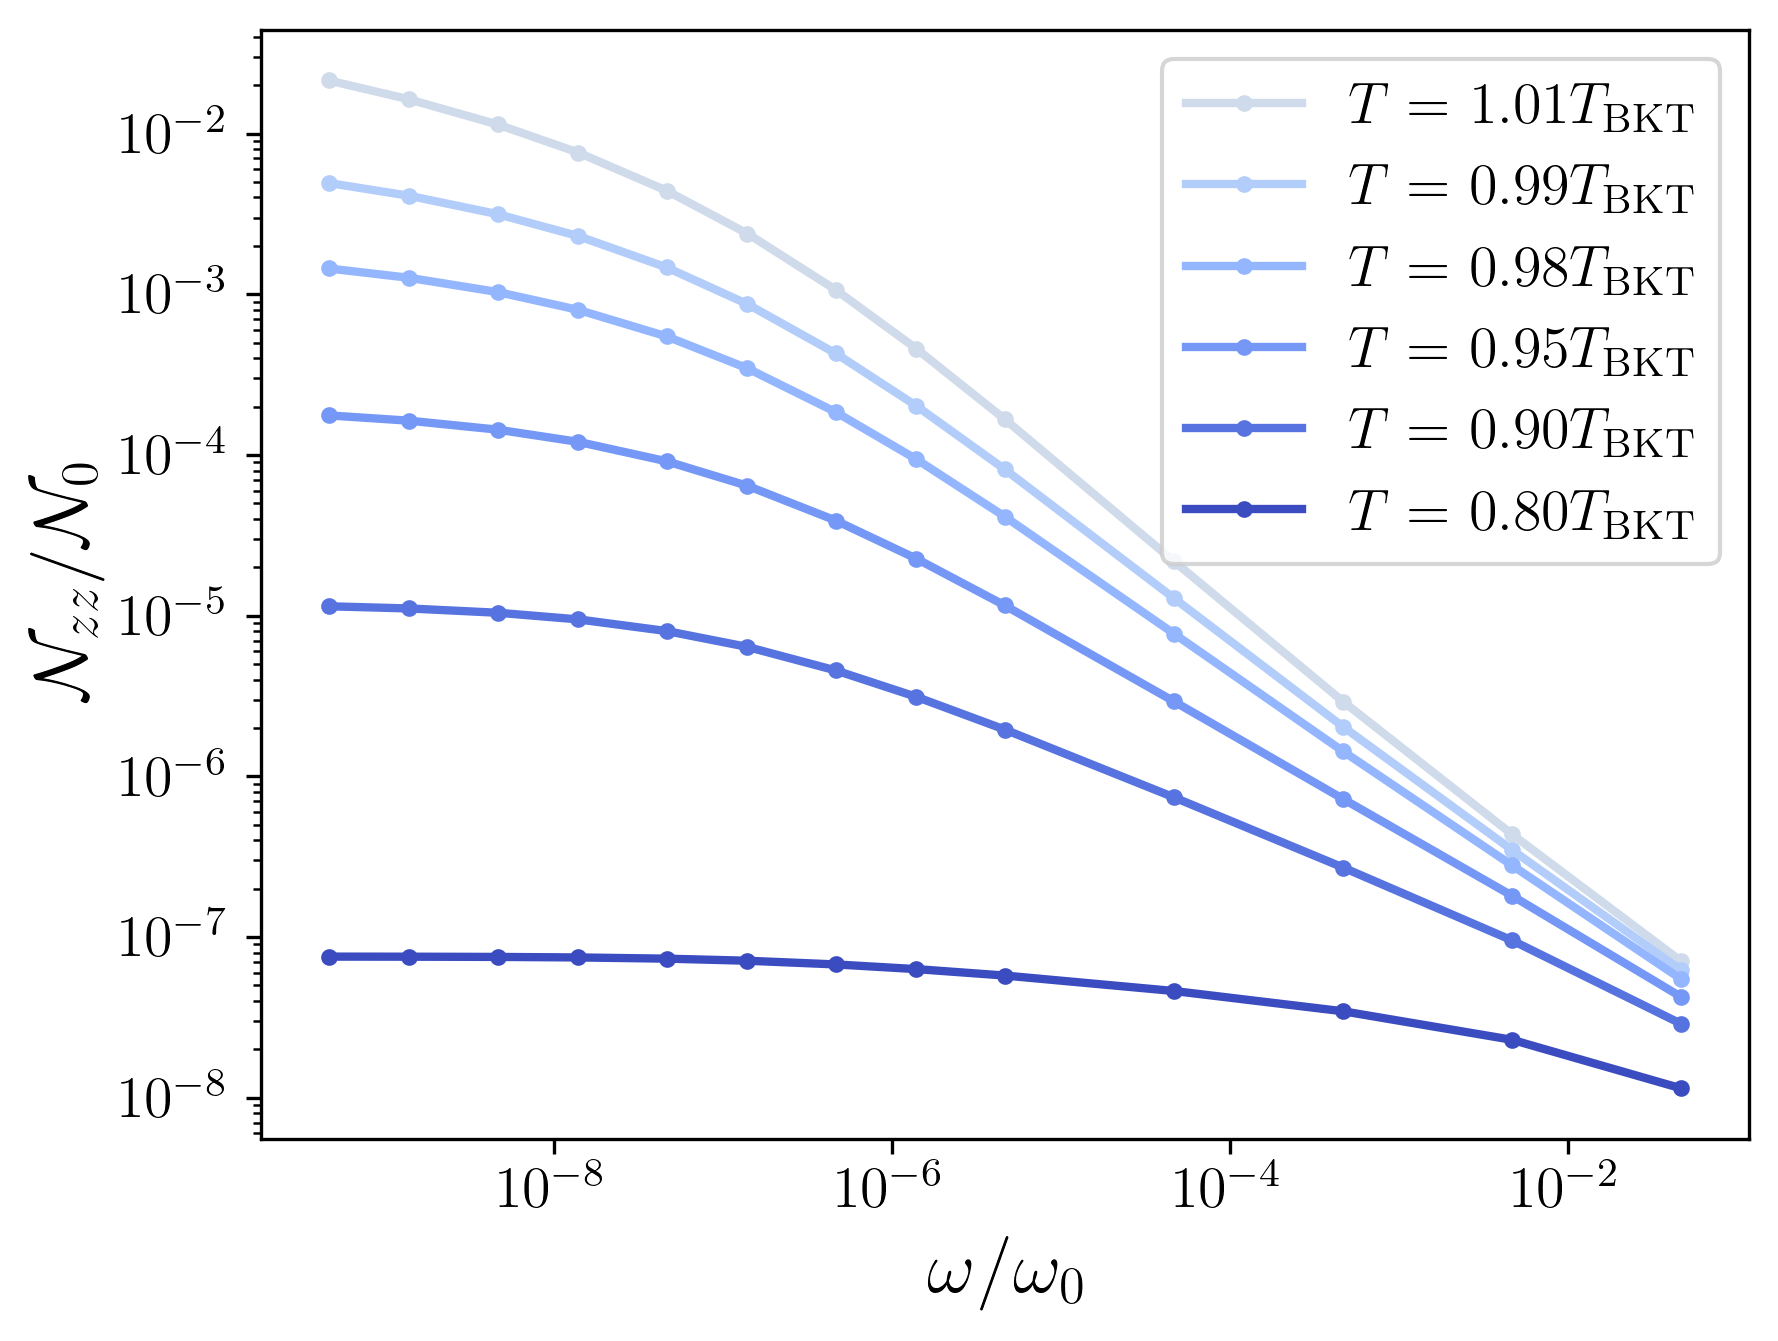

3.0


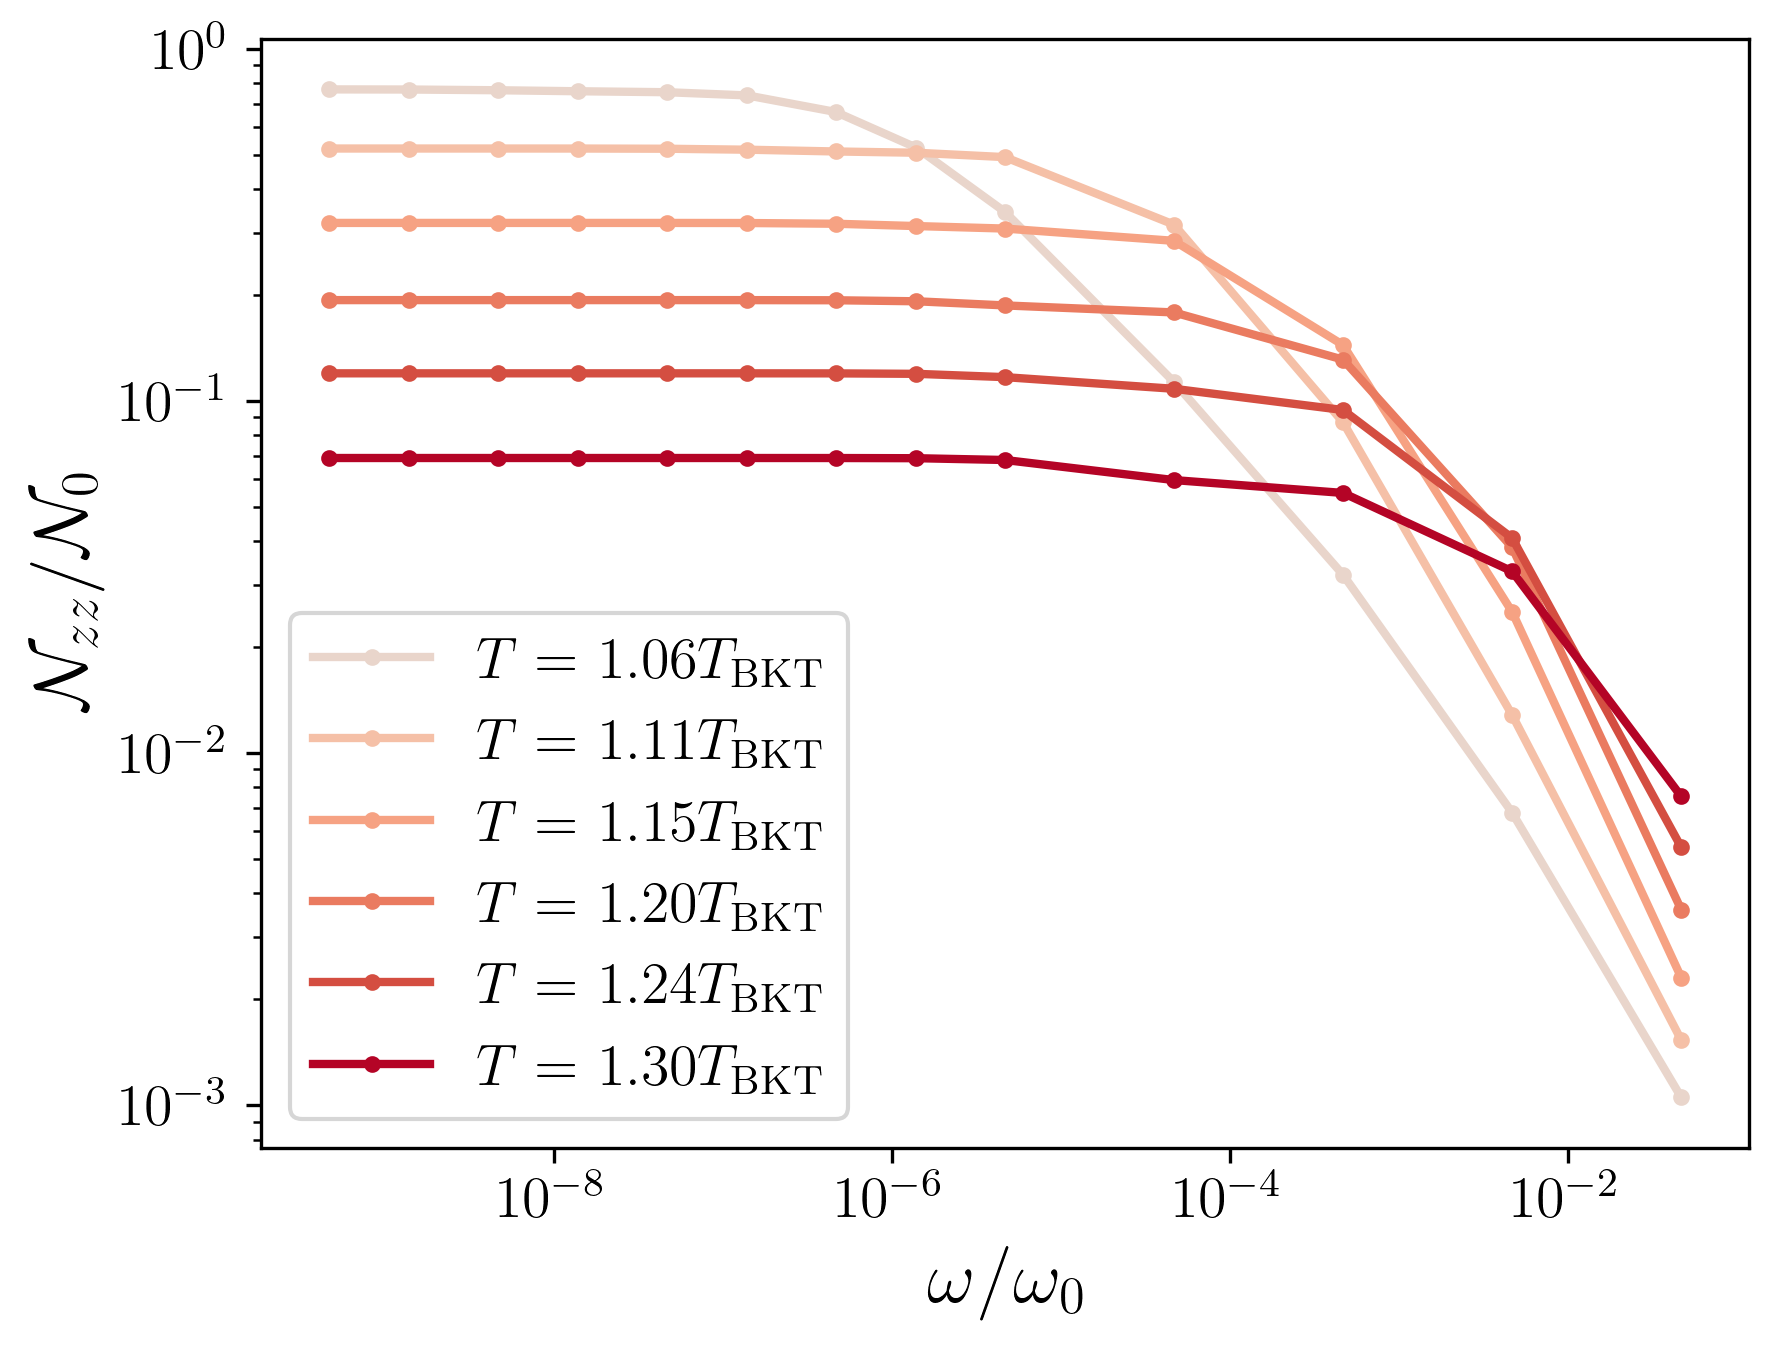

300.0


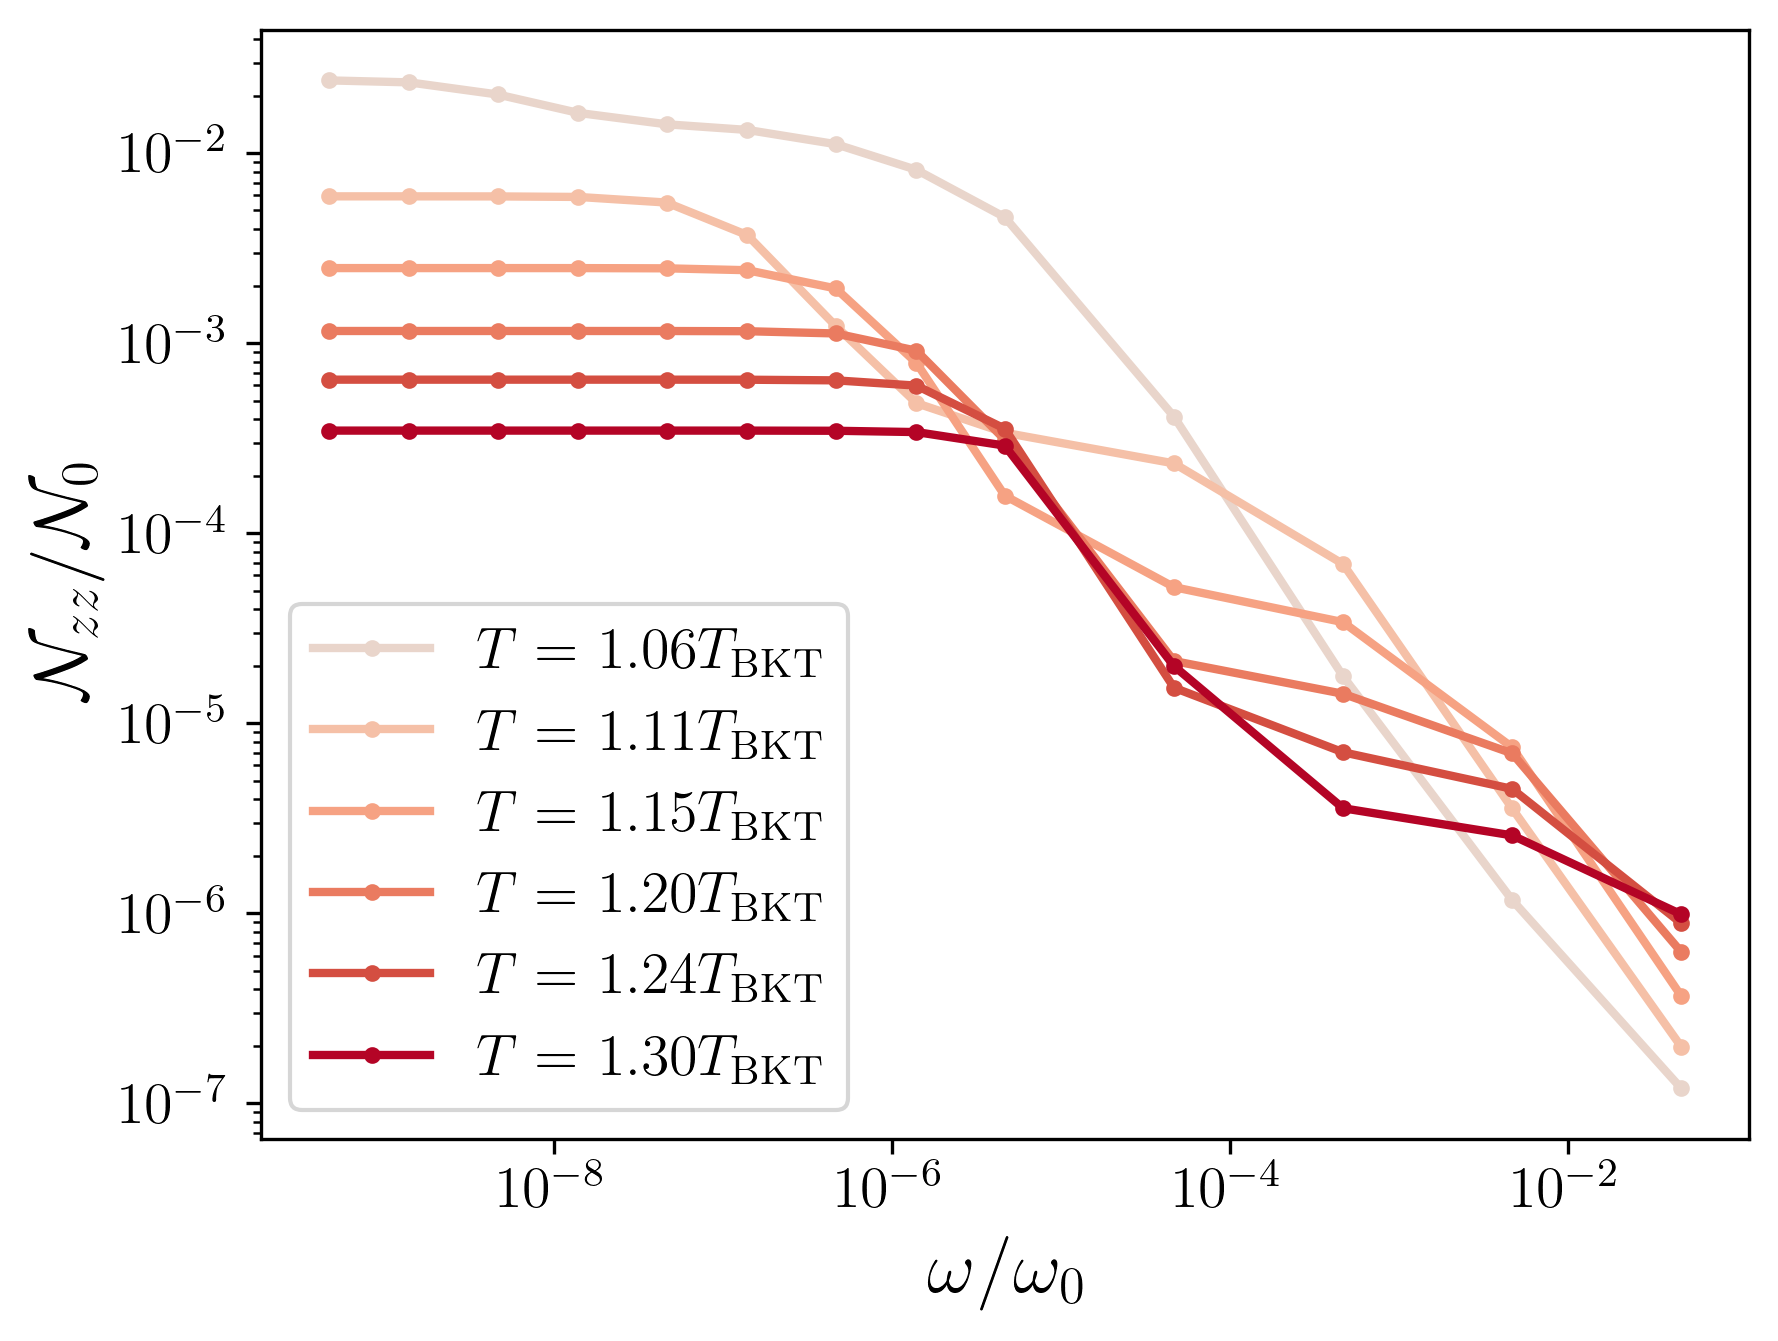

In [11]:
tindxs = [14,13,12,10,7,0]
zindx = 1
print(zs[zindx])

cs = cm.coolwarm(np.linspace(0.,.45,len(tindxs)))

i=0
for tindx in tindxs:
    plt.plot(ws[1:],noise[tindx,zindx,1:],color=cs[-1-i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=temps[tindx]/TBKT)+r'$T_{\rm BKT}$')
    i+=1
    
    
plt.legend(loc='lower left',framealpha=.9)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_w_low_temp_z=3.pdf",bbox_inches='tight')

plt.show()

zindx = 7
print(zs[zindx])
i=0
for tindx in tindxs:
    plt.plot(ws[1:],noise[tindx,zindx,1:],color=cs[-1-i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=temps[tindx]/TBKT)+r'$T_{\rm BKT}$')
    i+=1
    
    
plt.legend()
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_w_low_temp_z=300.pdf",bbox_inches='tight')

plt.show()


tindxs = [18,21,24,27,30,34]
zindx = 1
print(zs[zindx])

cs = cm.coolwarm(np.linspace(0.55,1.,len(tindxs)))

i=0
for tindx in tindxs:
    plt.plot(ws[1:],noise[tindx,zindx,1:],color=cs[i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=temps[tindx]/TBKT)+r'$T_{\rm BKT}$')
    i+=1
    
plt.legend()
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_w_high_temp_z=3.pdf",bbox_inches='tight')

plt.show()

zindx = 7
print(zs[zindx])

cs = cm.coolwarm(np.linspace(0.55,1.,len(tindxs)))

i=0
for tindx in tindxs:
    plt.plot(ws[1:],noise[tindx,zindx,1:],color=cs[i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=temps[tindx]/TBKT)+r'$T_{\rm BKT}$')
    i+=1
    
plt.legend()
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_w_low_temp_z=300.pdf",bbox_inches='tight')

plt.show()